# Libs

In [1]:
import numpy  as np
import pandas as pd
import os

import datetime
import warnings
import pickle
import gc



import seaborn           as sns
from pandas.plotting import scatter_matrix

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.impute          import SimpleImputer
from sklearn.compose         import ColumnTransformer
from sklearn.preprocessing   import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler

from sklearn.cluster      import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression
from sklearn.tree         import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_log_error


from IPython.display import display, FileLink, Image

#

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [13, 7]
np.random.seed(1642)

# Files

In [2]:
#from google.colab import files
KAGGLE = False

if KAGGLE == True:
  PATH = '/kaggle/input'
else:
  #from google.colab import drive
  #drive.mount('/content/drive/', force_remount=True)

  #DRIVE_PATH = '/content/drive/My Drive/statistical-learning'
  DRIVE_PATH = '/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam'
  #PATH = '/root/data'
  PATH = DRIVE_PATH + ''


for dirname, _, filenames in os.walk('{}'.format(PATH)):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam/itub/Cientista de Dados - V2.zip
/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam/itub/Fabio Amaral Dionysio - Prova Cientista de Dados.ipynb
/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam/itub/Questoes/modulo 3 - regressao - questao 1 - b.png
/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam/itub/Questoes/regressao_2.csv
/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam/itub/Questoes/modulo 3 - regressao - questao 1 - a.png
/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam/itub/Questoes/modulo 2 - classificacao - questao 9.png
/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam/itub/Questoes/modulo 2 - classificacao - questao 11.png
/home/duarthiago/Documents/Dropbox/github/science-avec-des/itub_data-science-exam/


# Módulo 1

## 1

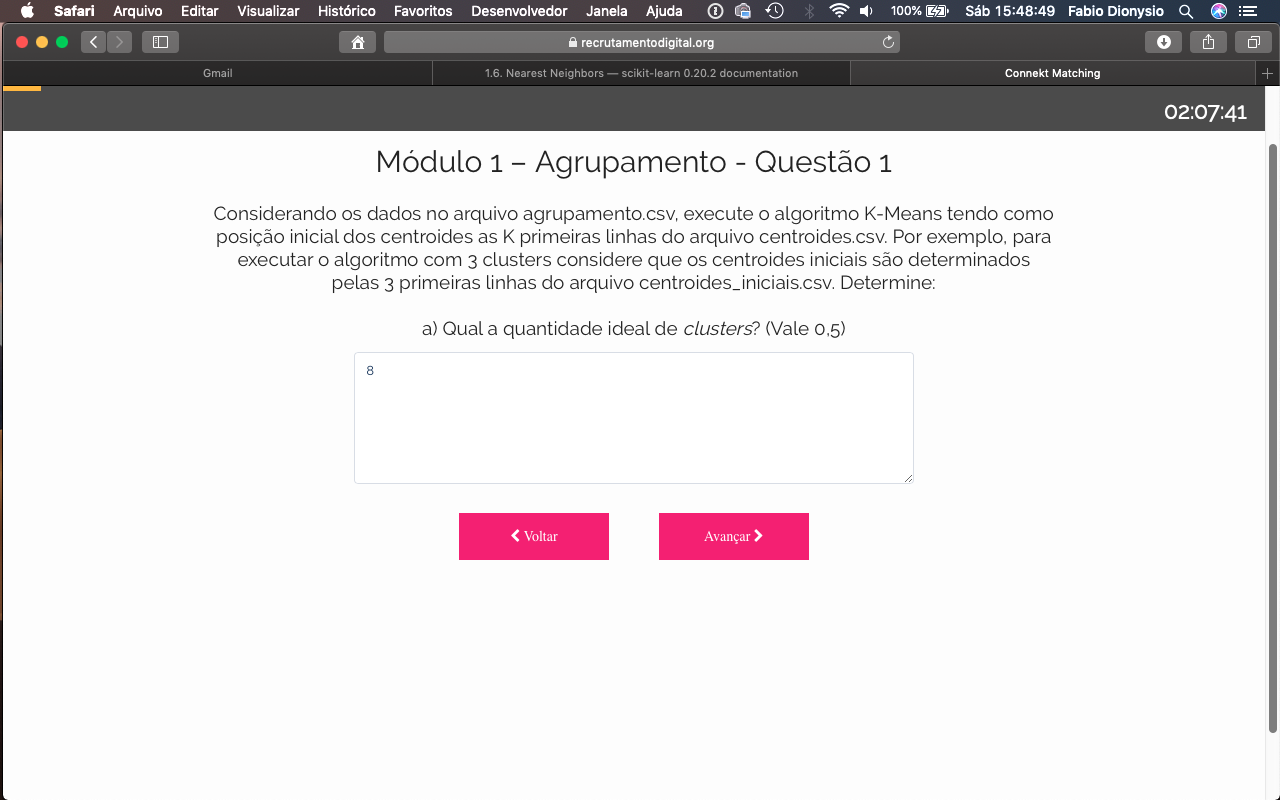

In [3]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 1 - a.png'.format(PATH), width=900)

In [4]:
agr      = pd.read_csv('{}/itub/Questoes/agrupamento.csv'.format(PATH))
centroid = pd.read_csv('{}/itub/Questoes/centroides_iniciais.csv'.format(PATH))

display(agr.head())
display(agr.shape)
display(centroid.head())

V1        V2        V3
0  0.274192  0.205828  0.465012
1 -0.112940  0.182955  0.104824
2  0.072626 -0.000491  0.194147
3  0.126573  0.027202  0.075395
4  0.080854 -0.144031 -0.199187

(4000, 3)

V1        V2        V3
0  0.010759  0.150686  0.049970
1  0.911179 -0.010054 -0.093556
2 -0.526115  1.049235 -0.132915
3  0.603327  1.353277  0.159188
4 -0.084500 -0.260496  0.611731

CPU times: user 6.05 s, sys: 7.25 s, total: 13.3 s
Wall time: 3.46 s


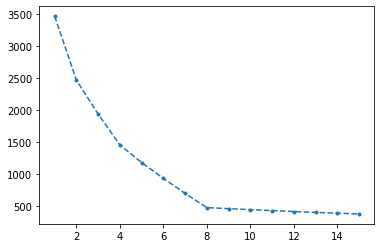

In [5]:
%%time

inertia = list()
for k in range(1, 16):
  kmeans = KMeans(n_clusters = k)
  kmeans.cluster_centers_ = centroid.iloc[:k ,:].as_matrix()
  kmeans.fit(agr)
  inertia.append(kmeans.inertia_)

plt.plot([i for i in range(1,16)], inertia, '--.')

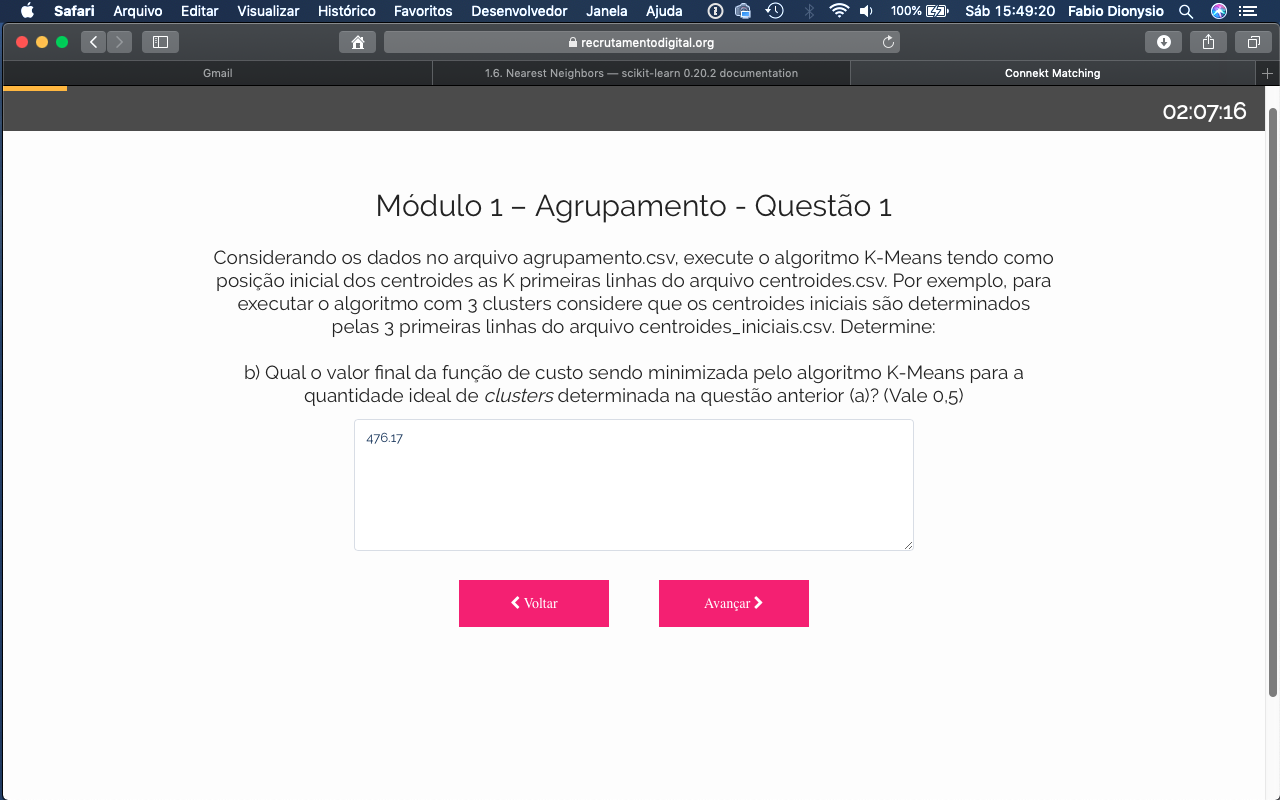

In [6]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 1 - b.png'.format(PATH), width=900)

In [7]:
for i in range(1,16):
  print(i, inertia[i-1])

1 3472.3222133639156
2 2472.0502290992054
3 1942.0862461179208
4 1456.6546029480965
5 1182.1557628473804
6 934.5900613923018
7 699.4945088577063
8 476.1691752377431
9 459.81271709995667
10 444.7645029605709
11 429.5402516138326
12 414.7467937915944
13 401.31632323926914
14 388.2622113811919
15 377.62182056130695


## 2

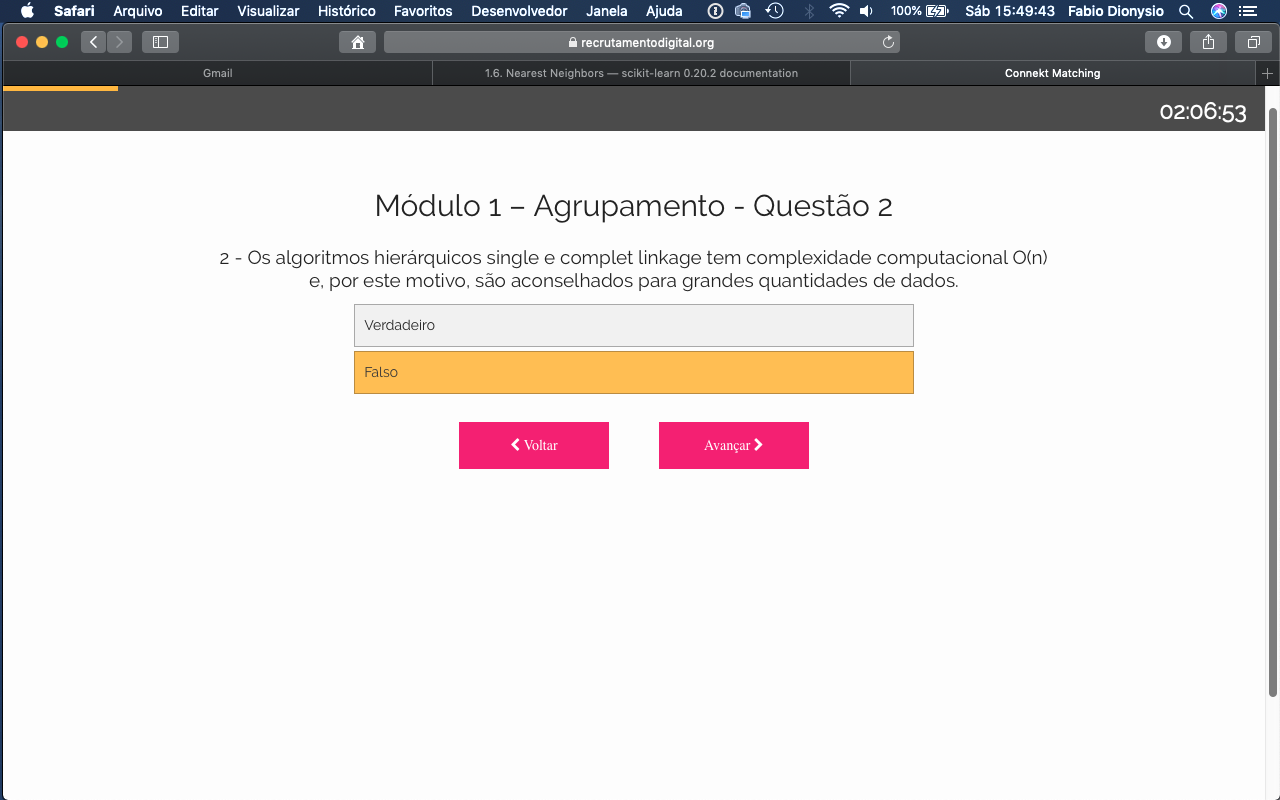

In [8]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 2.png'.format(PATH), width=900)

## 3

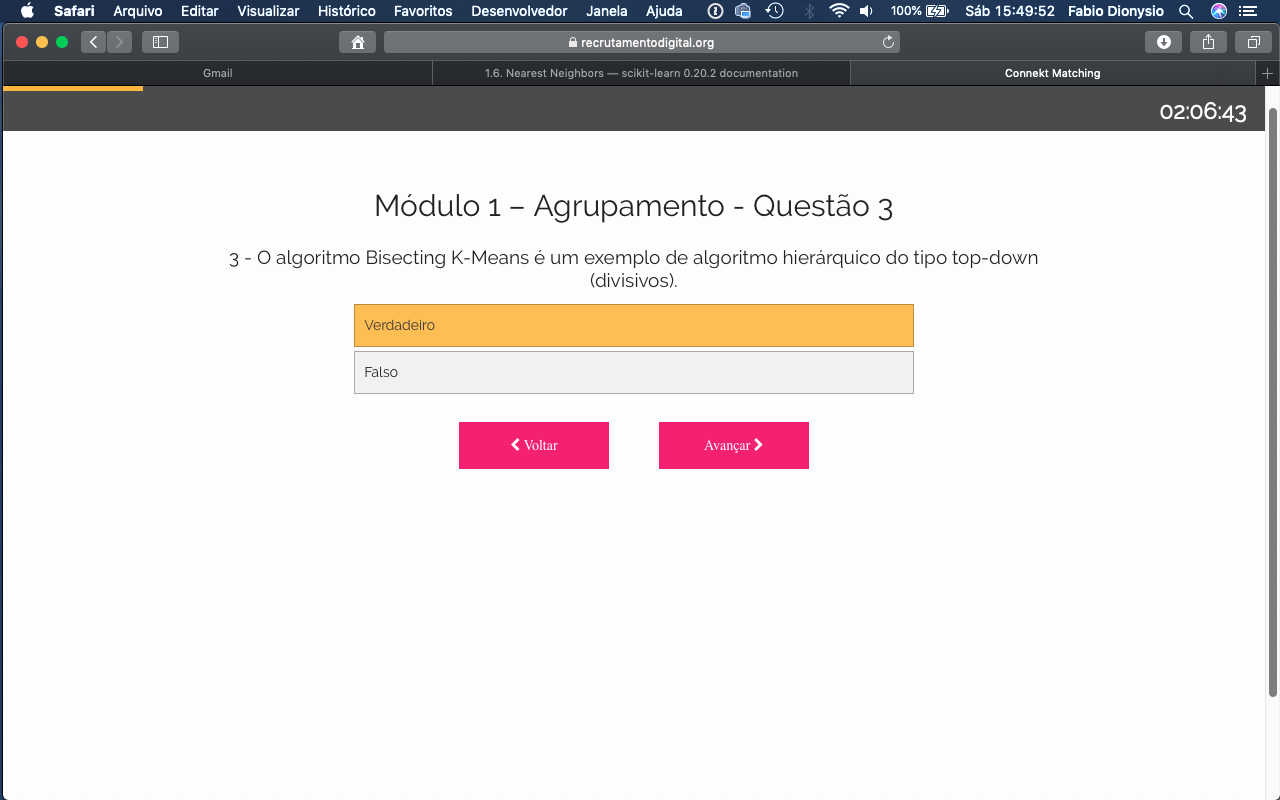

In [9]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 3.png'.format(PATH), width=900)

## 4

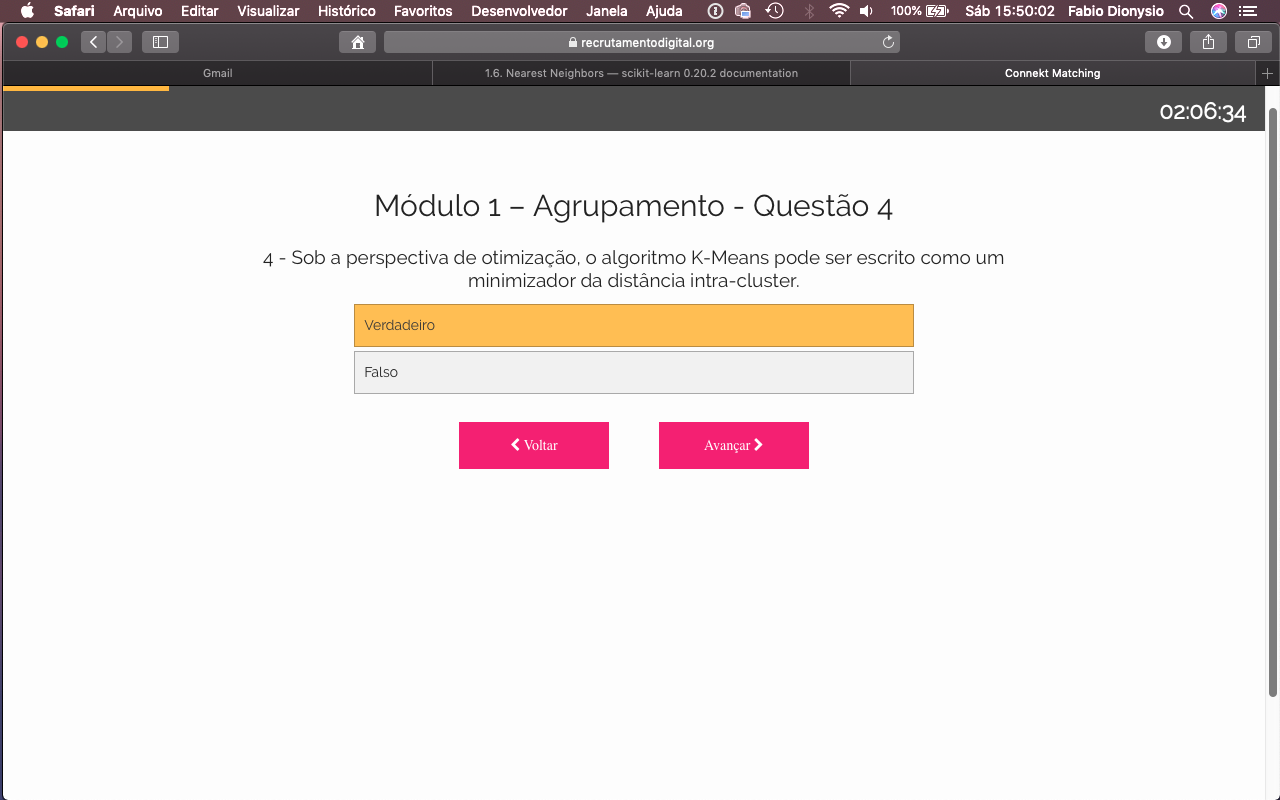

In [10]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 4.png'.format(PATH), width=900)

## 5

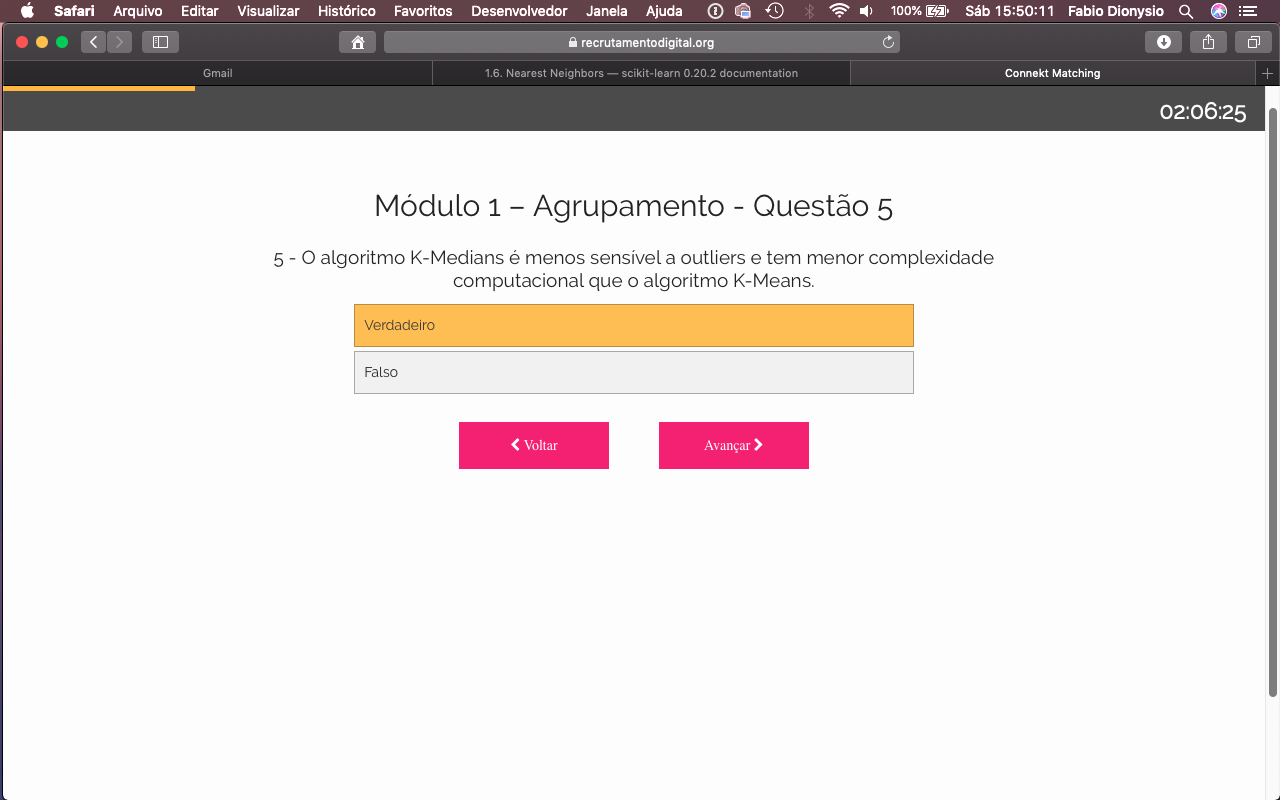

In [11]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 5.png'.format(PATH), width=900)

## 6

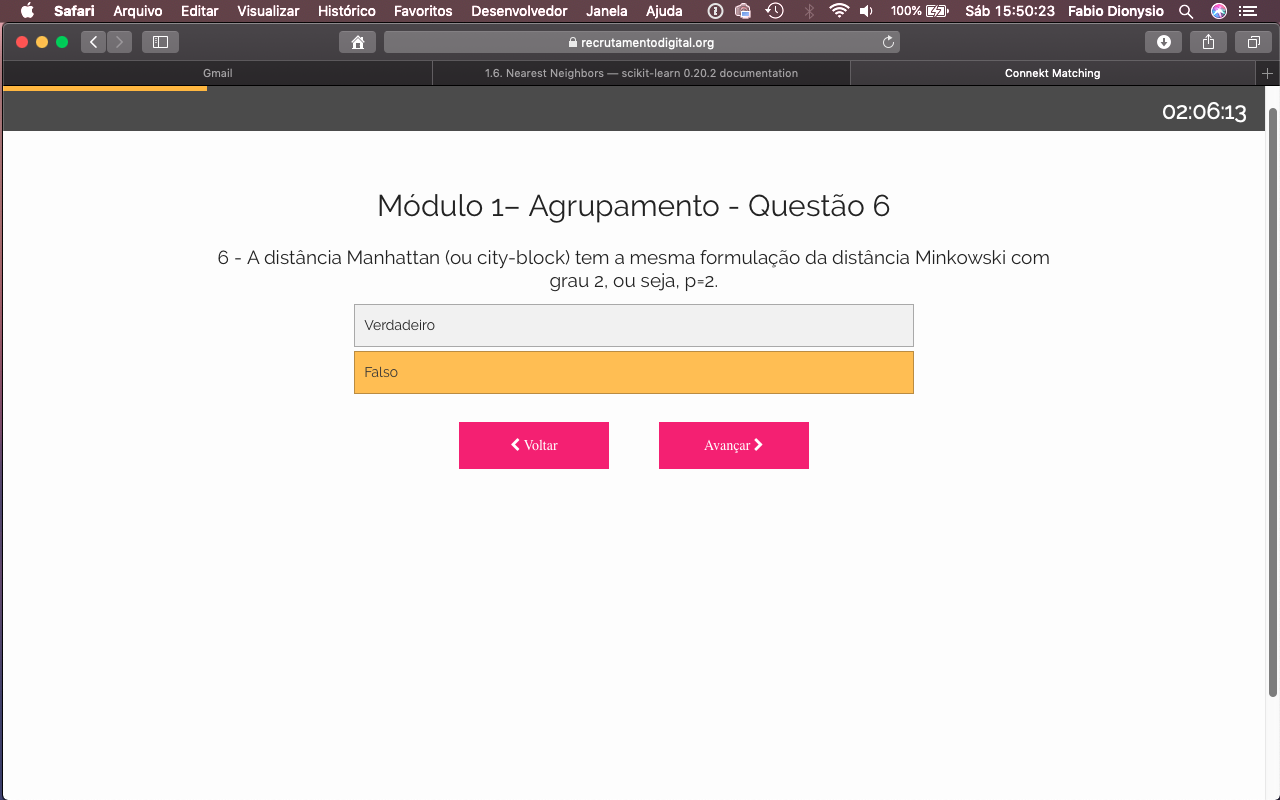

In [12]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 6.png'.format(PATH), width=900)

## 7

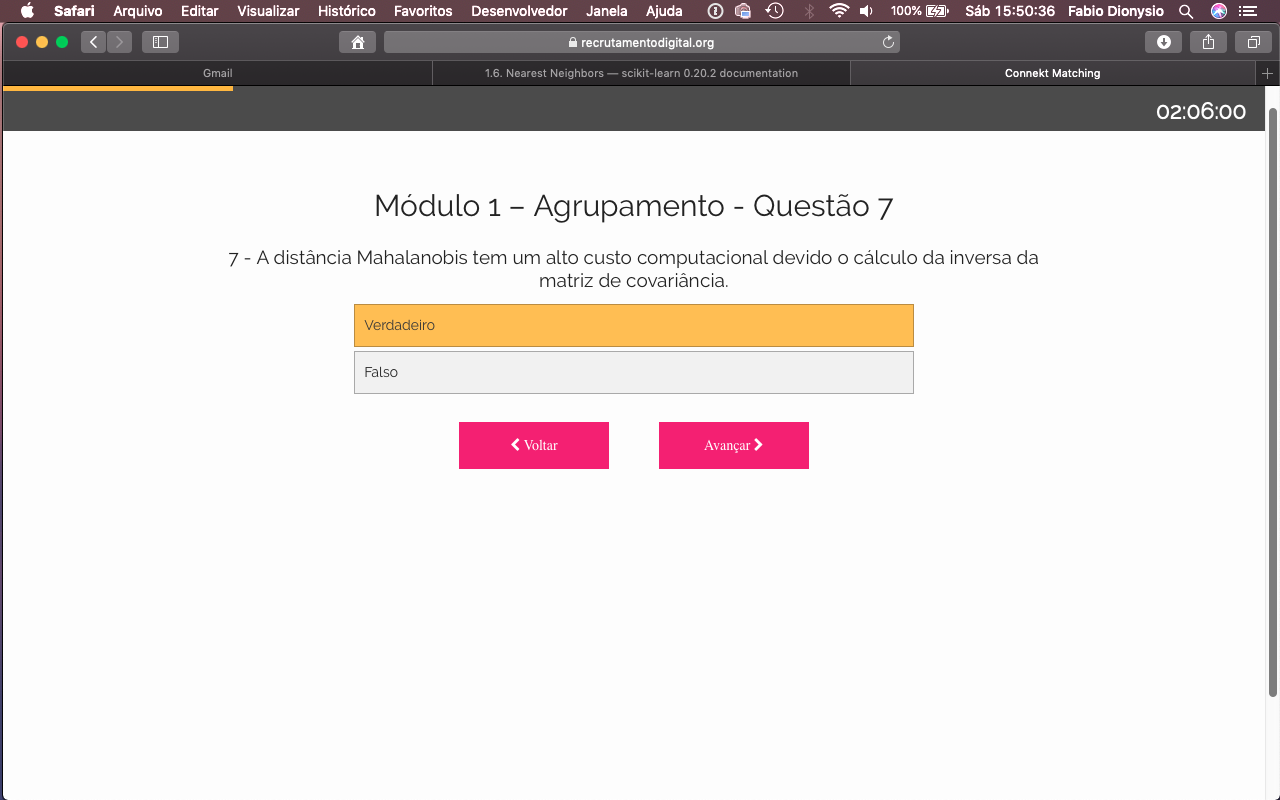

In [13]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 7.png'.format(PATH), width=900)

## 8

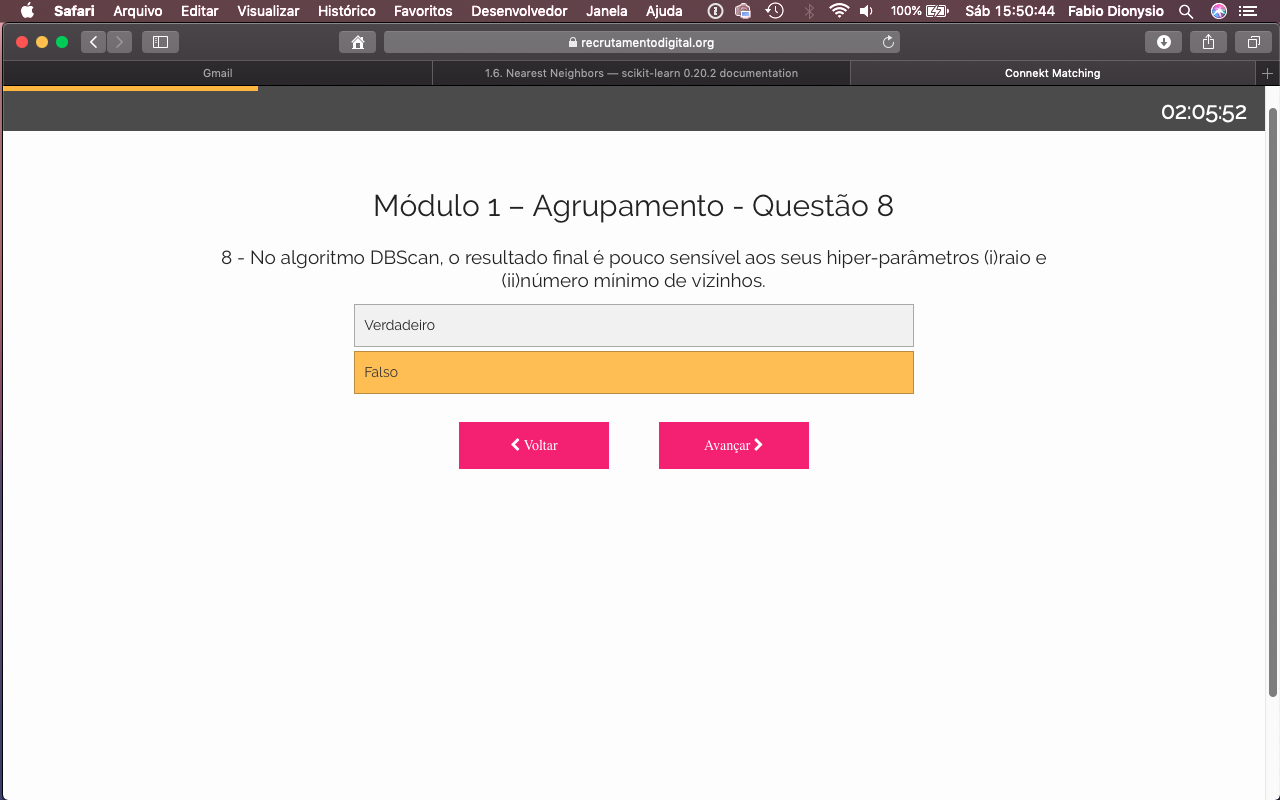

In [14]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 8.png'.format(PATH), width=900)

## 9

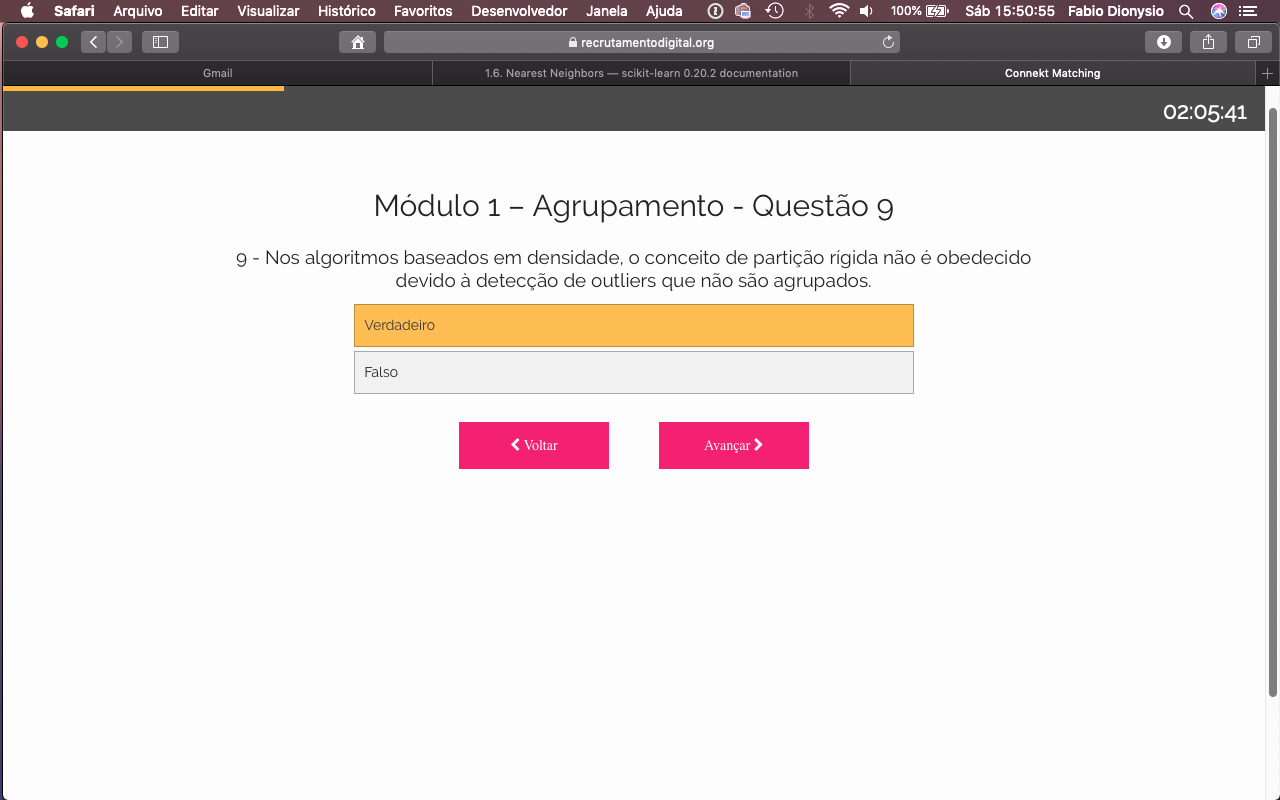

In [15]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 9.png'.format(PATH), width=900)

## 10

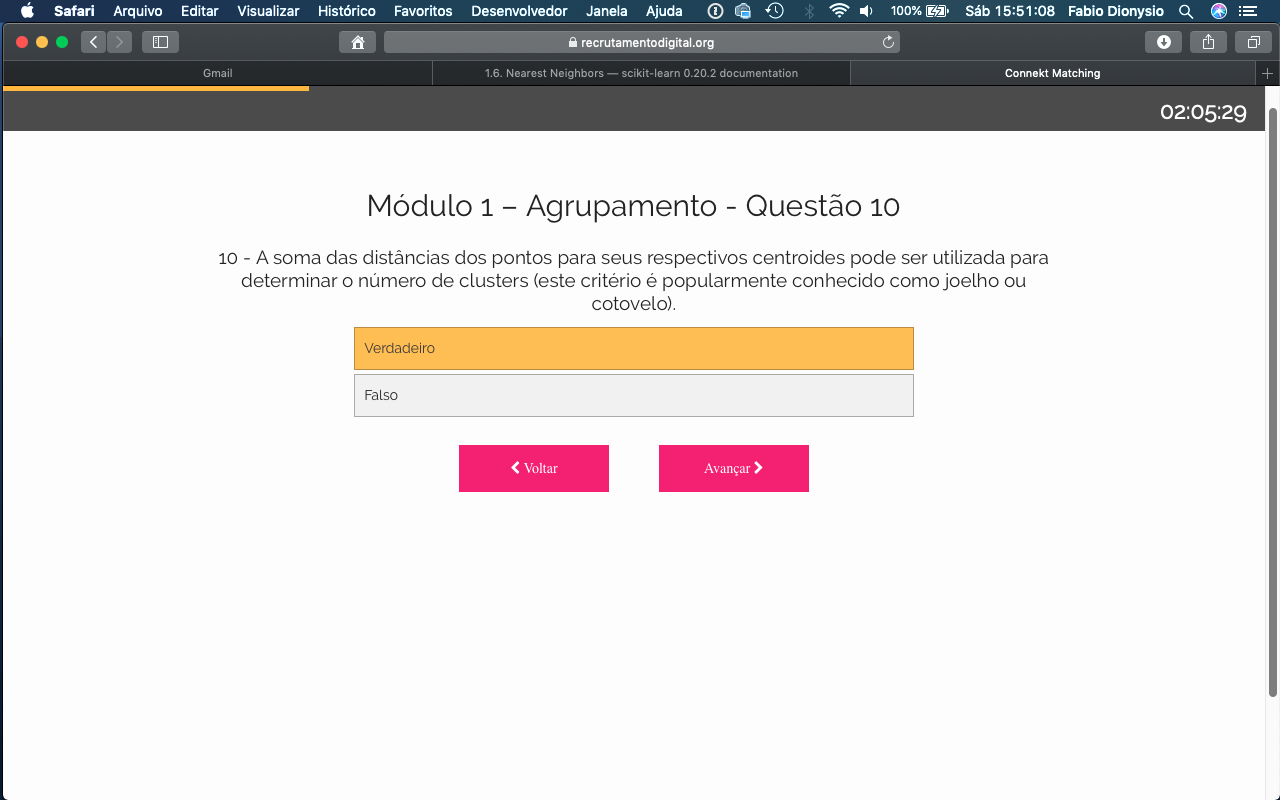

In [16]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 10.png'.format(PATH), width=900)

## 11

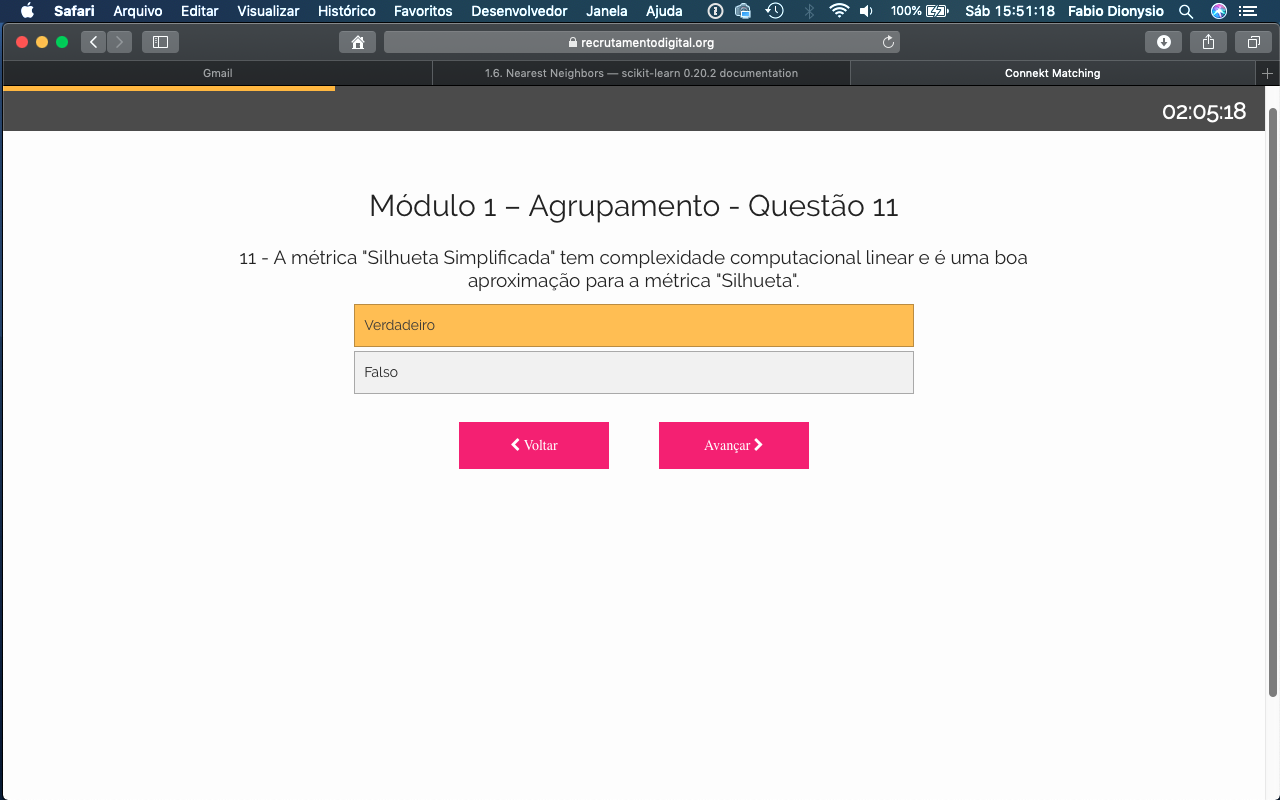

In [17]:
Image(filename = '{}/itub/Questoes/modulo 1 - agrupamento - questao 11.png'.format(PATH), width=900)

# Módulo 2

## 1

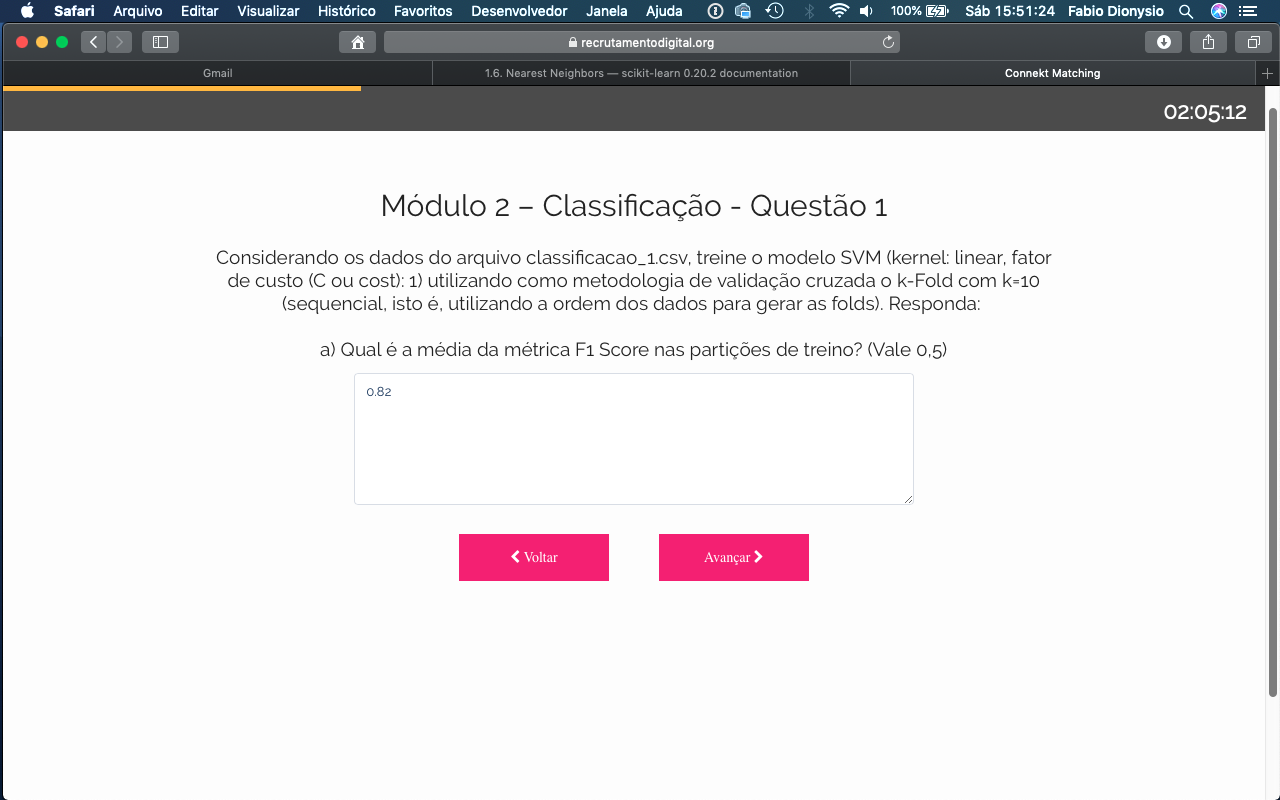

In [18]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 1 - a.png'.format(PATH), width=900)

In [19]:
from sklearn.svm             import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import f1_score


df = pd.read_csv('{}/itub/Questoes/classificacao_1.csv'.format(PATH))
df.head()

v_1      v_2      v_3      v_4      v_5      v_6      v_7      v_8  \
0 -0.79207 -1.53485  0.60615 -2.27976 -1.43551  2.44272 -1.18421  1.83623   
1  0.21583 -0.93657  0.75756  0.37746 -2.60988  1.85922  2.62460  0.24354   
2 -0.32059 -2.16565 -1.63757  0.79361 -1.95570 -0.18525 -0.88095 -0.98657   
3 -0.12929 -0.06134  3.58236 -1.48172  1.41317 -1.47032 -1.05289  1.87866   
4 -1.85108 -3.65335  0.10311 -0.18259 -1.71422  1.21289 -2.22696 -1.53030   

       v_9     v_10     v_11     v_12     v_13     v_14     v_15     v_16  \
0 -2.79111  0.38763 -2.84928 -1.45238 -3.43264 -0.70667 -0.71361 -2.32598   
1 -3.43729 -0.26536  1.34649 -1.45203  3.12942  2.18204 -0.95989 -2.69853   
2 -4.14707  1.61340 -0.68718 -1.17566 -0.04852  1.20091  1.55407 -3.31448   
3 -1.99177  1.13534  0.49201 -0.21985 -1.43865 -0.64562 -0.28754  3.76759   
4 -2.15125  0.77353 -2.36629 -1.76121 -5.21324 -0.88661 -0.24870  0.90993   

      v_17     v_18  target  
0 -2.71869 -1.76932       0  
1  4.91233  0.09381       0  
2  0.24915  3.10828       0  
3 -3.87927 -0.74953       0  
4 -0.10623 -1.38851       0

In [20]:
scr_f1 = cross_val_score(SVC(kernel='linear', C=1), df.drop(labels=['target'], axis=1), df['target'], cv=10, scoring='f1')

display(scr_f1)
display(np.mean(scr_f1))

array([0.75630252, 0.8       , 0.81889764, 0.765625  , 0.84375   ,
       0.82089552, 0.80882353, 0.875     , 0.83333333, 0.8       ])

0.8122627543936837

**IMPORTANTE**: a solucao acima esta incorreta!

A questao pede o score no **treino**, a `cross_val_score` retorna o score no teste! 

In [21]:
scores = list()

X = df.drop(labels=['target'], inplace=False, axis=1)
y = df['target']

for train_id, test_id in KFold(n_splits=10).split(df):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  svc = SVC(kernel='linear', C=1)
  svc.fit(X_train, y_train)
  
  # NAS PARTICOES DE TREINO !
  # y_pred = svc.predict(X_test)
  # scores.append(f1_score(y_test, y_pred))

  y_pred = svc.predict(X_train)
  scores.append(f1_score(y_train, y_pred))

display(scores)
display(np.mean(scores))

[0.8177929854576561,
 0.8222029488291414,
 0.8202923473774721,
 0.8340425531914895,
 0.8242424242424242,
 0.8240418118466899,
 0.8258967629046369,
 0.8216123499142366,
 0.8161120840630474,
 0.8177855274629467]

0.822402179528974

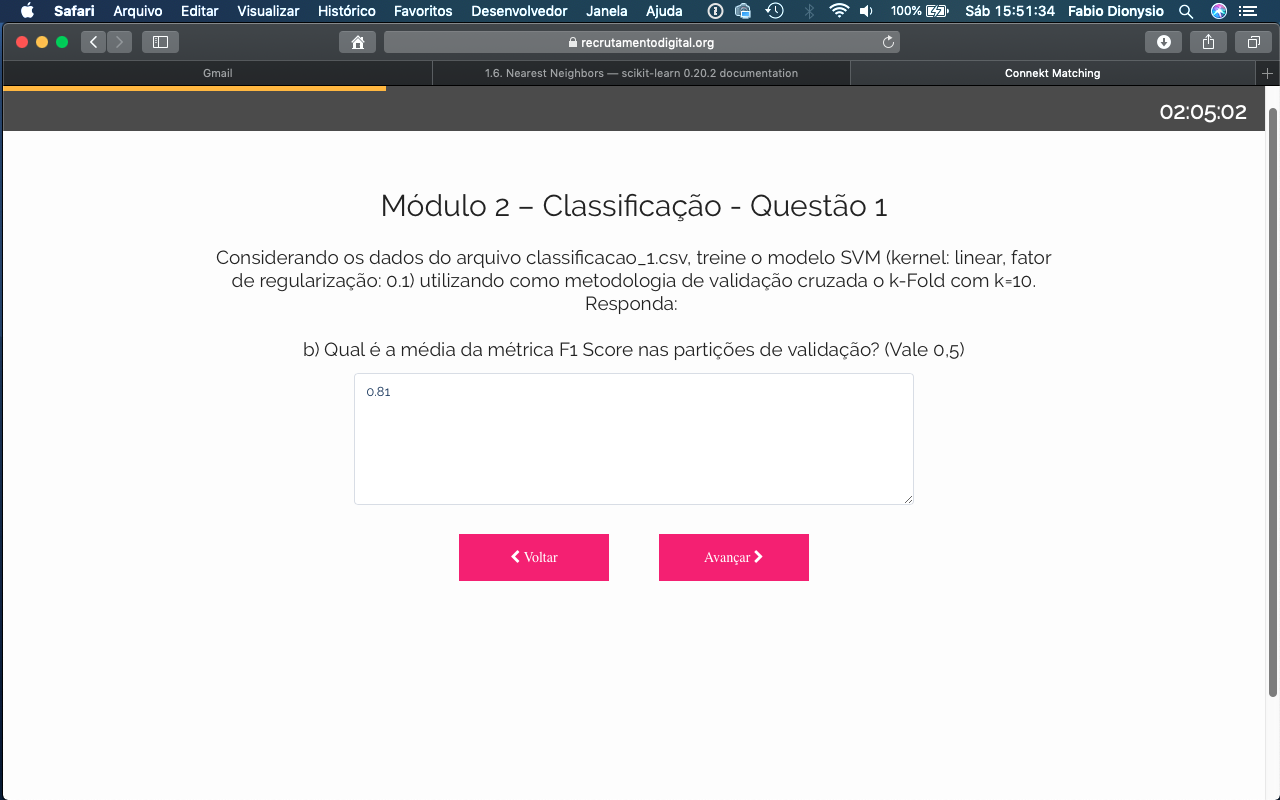

In [22]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 1 - b.png'.format(PATH), width=900)

In [23]:
scores = list()

X = df.drop(labels=['target'], inplace=False, axis=1)
y = df['target']

for train_id, test_id in KFold(n_splits=10).split(df):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  svc = SVC(kernel='linear', C=0.1)
  svc.fit(X_train, y_train)
  
  # NAS PARTICOES DE VALIDACAO !
  y_pred = svc.predict(X_test)
  scores.append(f1_score(y_test, y_pred))

display(scores)
display(np.mean(scores))

[0.7543859649122807,
 0.8062015503875969,
 0.8225806451612904,
 0.7478260869565219,
 0.8333333333333334,
 0.8057553956834532,
 0.8435374149659863,
 0.8688524590163934,
 0.851063829787234,
 0.8]

0.8133536680204092

## 2

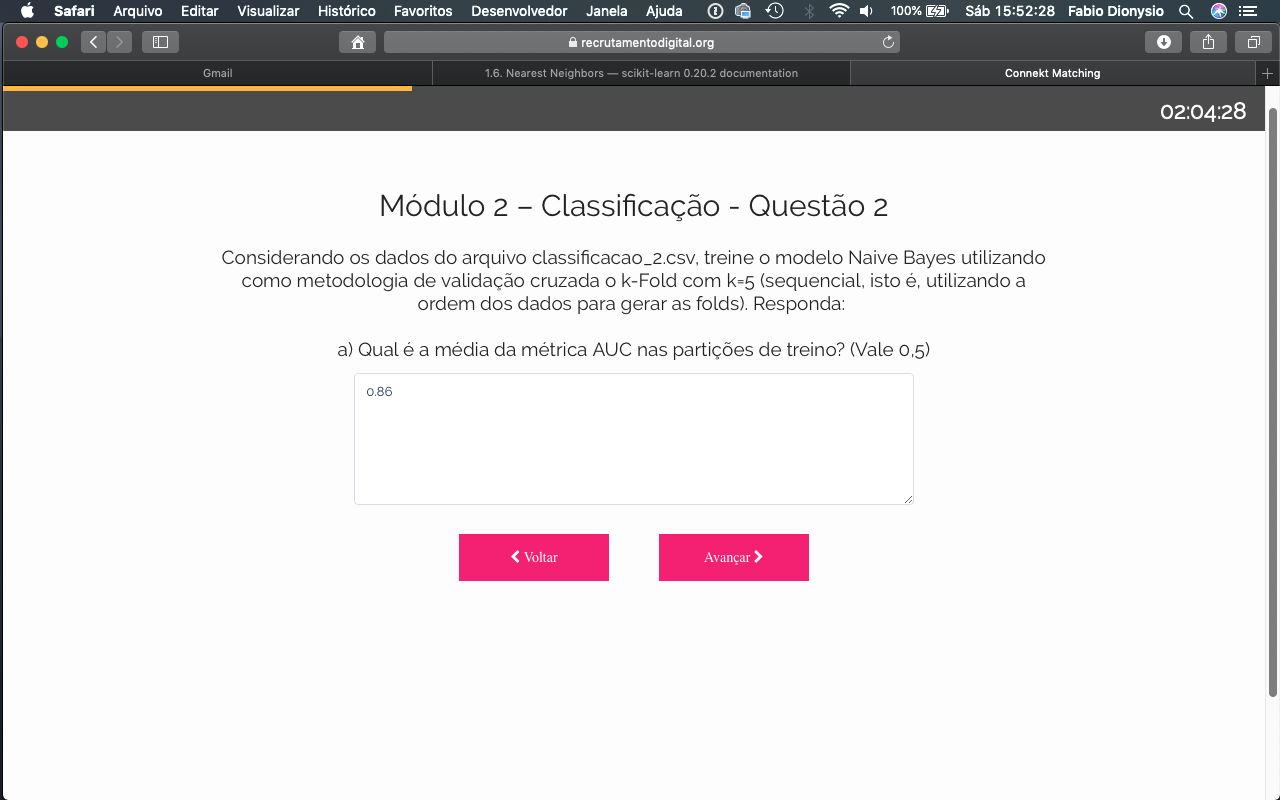

In [24]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 2 - a.png'.format(PATH), width=900)

In [65]:
from sklearn.naive_bayes     import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import f1_score, roc_auc_score


df = pd.read_csv('{}/itub/Questoes/classificacao_2.csv'.format(PATH))
df.head()

v_1      v_2      v_3      v_4      v_5      v_6      v_7      v_8  \
0 -0.79138 -1.45877 -0.61498  6.39546 -0.19283 -4.92609  3.72728  2.36581   
1  0.79527 -0.14828  0.49140  0.10649  4.32203 -1.55355 -0.62966 -0.27509   
2 -2.30926  1.59887  1.23513 -4.49395  0.50298  4.10219  0.48356 -0.51920   
3  1.97998 -2.71683 -0.73252  3.08358  3.52049 -0.61567 -0.06206  1.33451   
4 -1.22339  2.38761 -2.15763 -1.91316  1.31427  0.18067 -2.20922  1.43218   

       v_9     v_10     v_11     v_12  target  
0  0.60241  2.85597  2.52876  2.09155       0  
1  4.06300 -1.11079  3.61077  1.11076       0  
2 -1.59507  1.75719 -1.71703  0.92375       1  
3  0.75546 -1.56391  1.00917  1.66555       0  
4  1.05498  0.18525  2.91384 -0.03258       1

In [66]:
scores = list()

X = df.drop(labels=['target'], inplace=False, axis=1)
y = df['target']

for train_id, test_id in KFold(n_splits=5).split(df):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  nb = BernoulliNB()
  nb.fit(X_train, y_train)
  

  y_pred = nb.predict(X_train)
  scores.append(roc_auc_score(y_train, y_pred))

display(scores)
display(np.mean(scores))

[0.6897520831769386,
 0.6984523809523809,
 0.7012363636363637,
 0.6931467994147316,
 0.6945870553636234]

0.6954349365088076

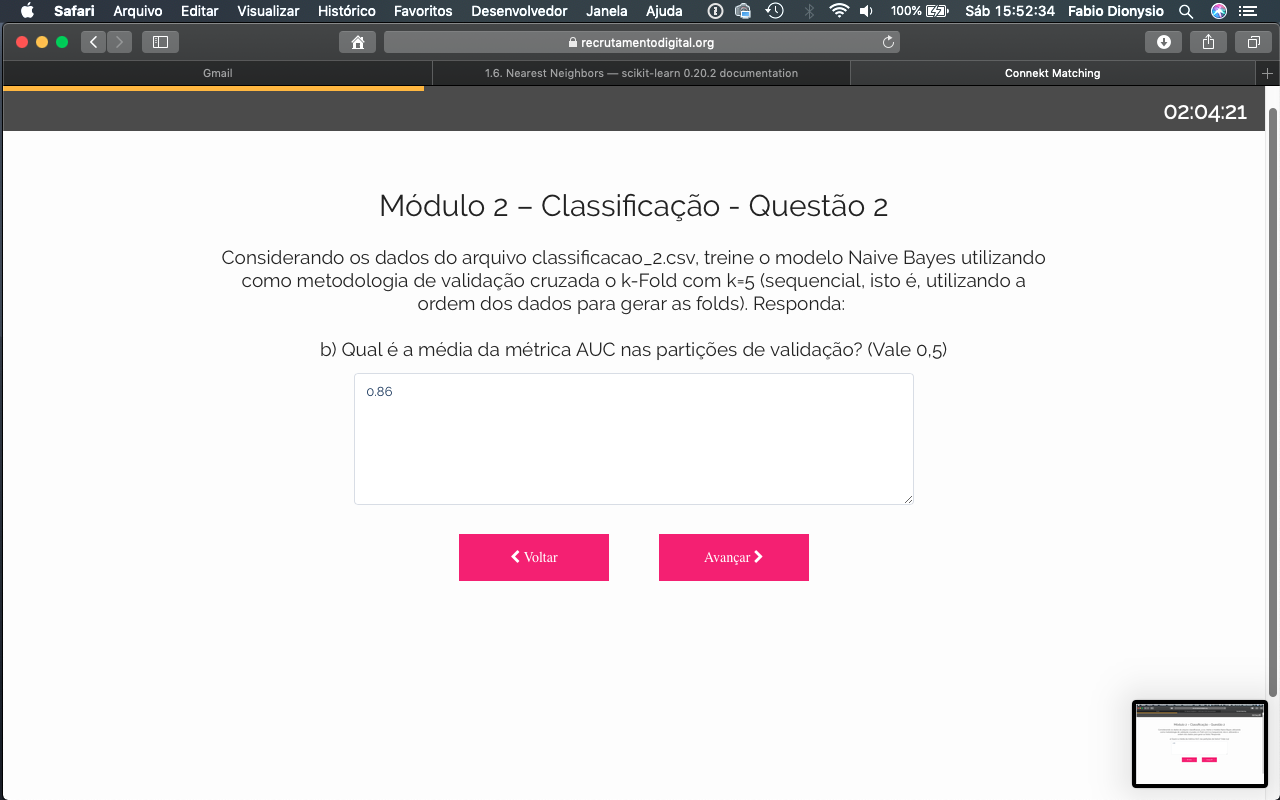

In [27]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 2 - b.png'.format(PATH), width=900)

In [67]:
scores = list()

X = df.drop(labels=['target'], inplace=False, axis=1)
y = df['target']

for train_id, test_id in KFold(n_splits=5).split(df):
  X_train, X_test = X.iloc[train_id], X.iloc[test_id]
  y_train, y_test = y.iloc[train_id], y.iloc[test_id]

  nb = BernoulliNB()
  nb.fit(X_train, y_train)
  
  # NAS PARTICOES DE TREINO !
  y_pred = nb.predict(X_test)
  scores.append(roc_auc_score(y_test, y_pred))

display(scores)
display(np.mean(scores))

[0.7134191176470588,
 0.6696829405162739,
 0.6728590675344882,
 0.6875175315568023,
 0.7129108555582742]

0.6912779025625795

## 3

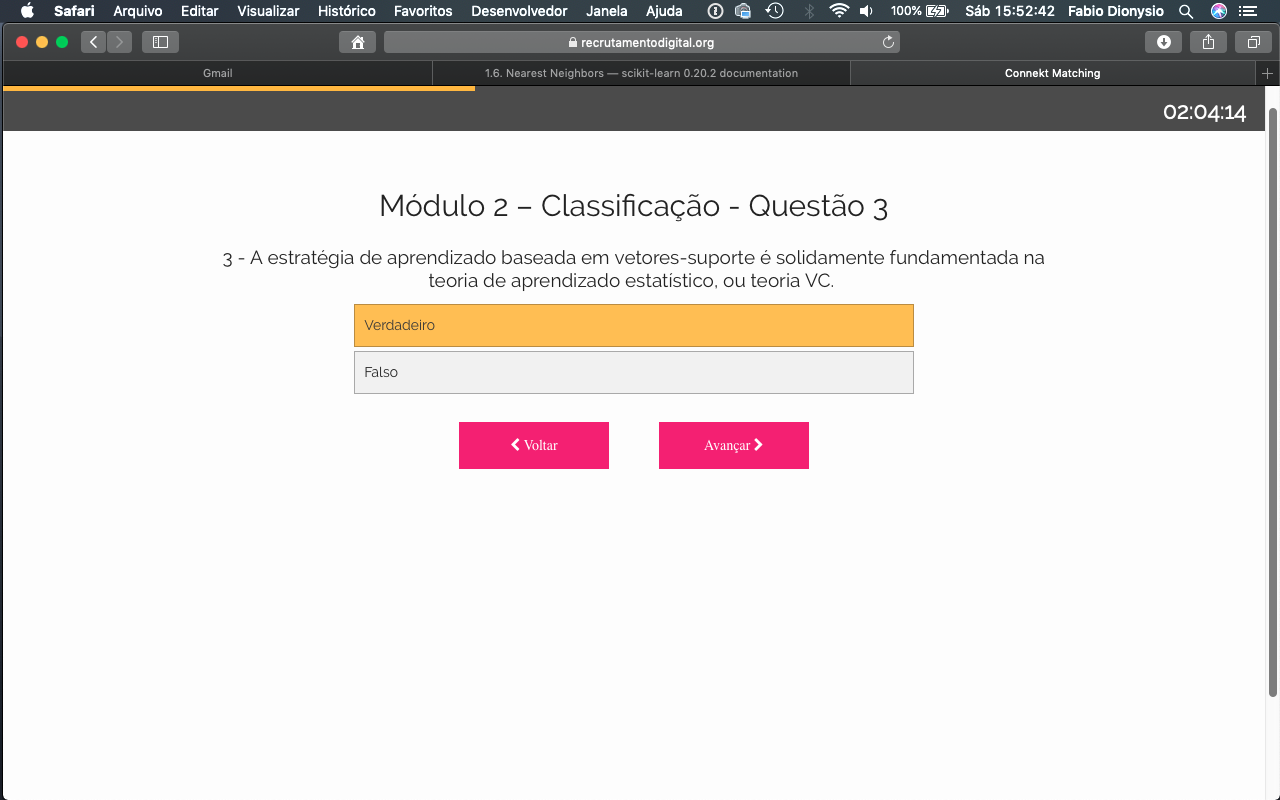

In [29]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 3.png'.format(PATH), width=900)

## 4

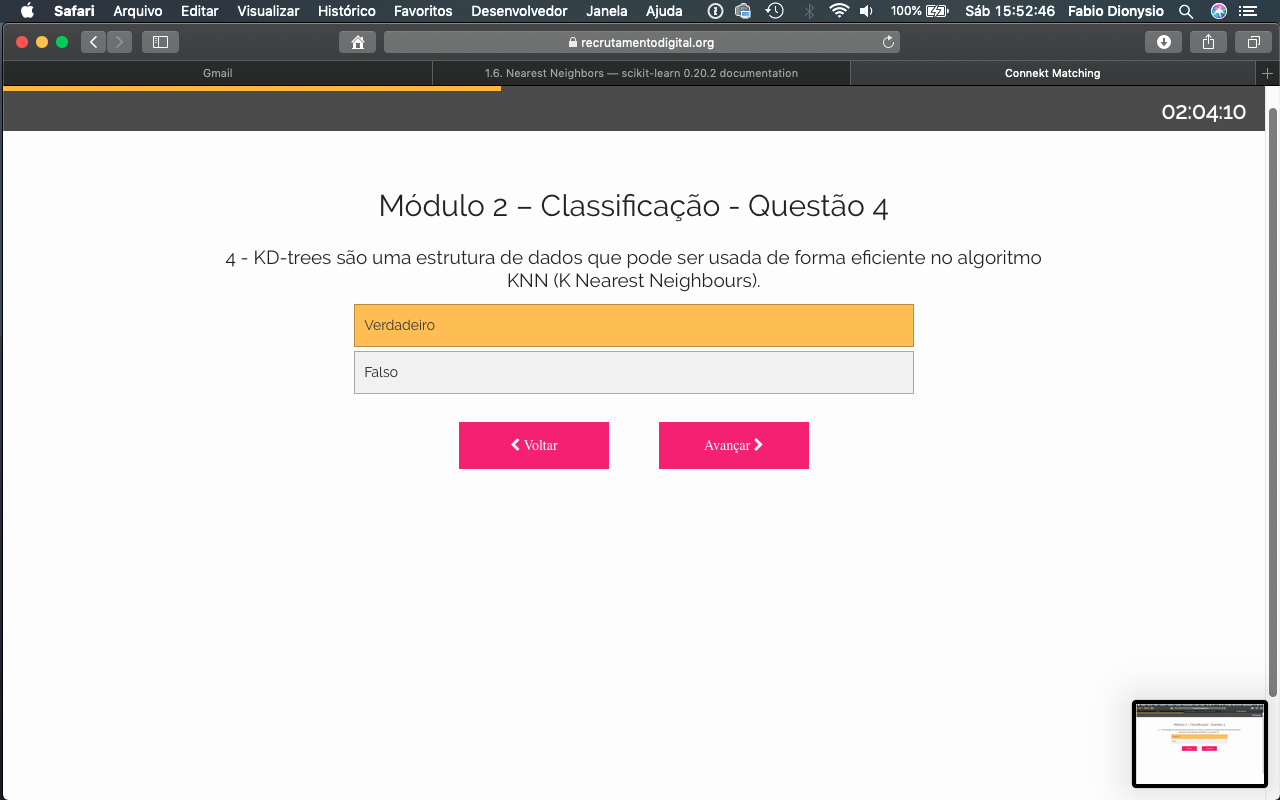

In [30]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 4.png'.format(PATH), width=900)

## 5

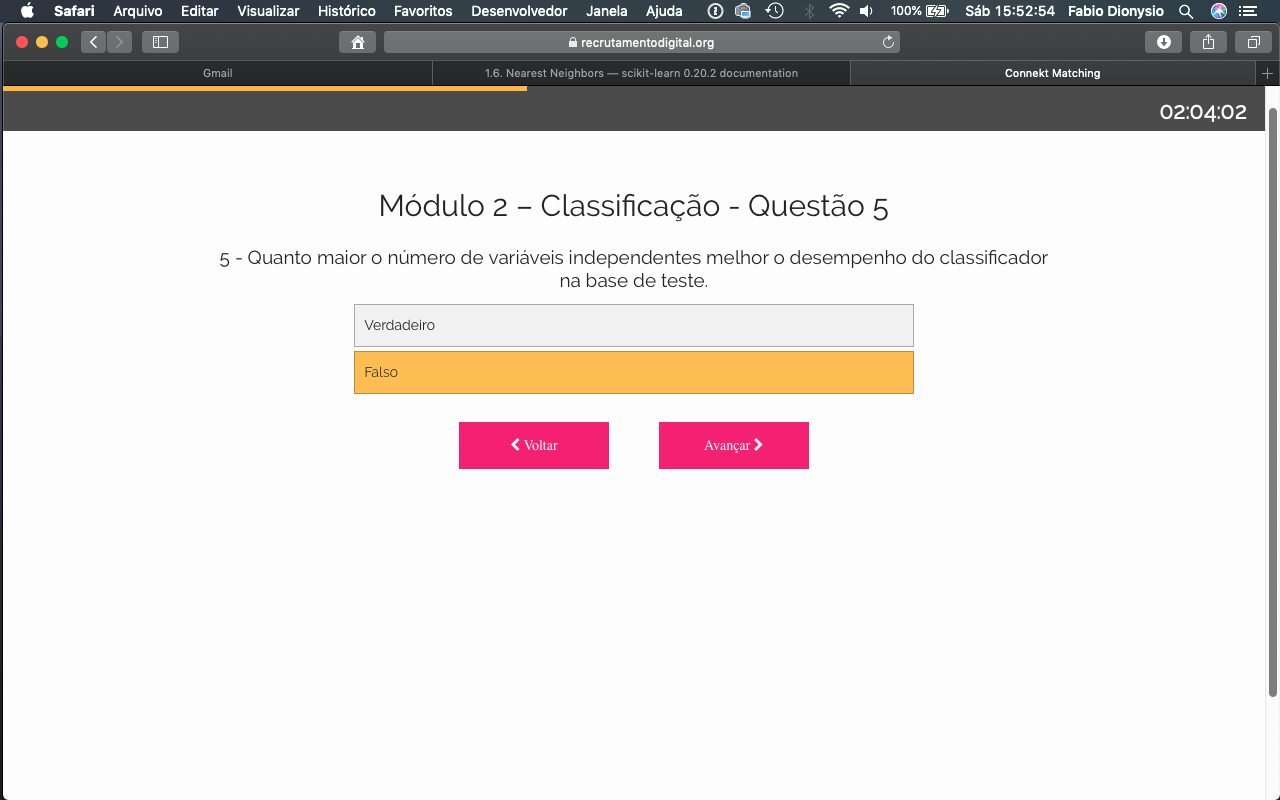

In [31]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 5.png'.format(PATH), width=900)

## 6

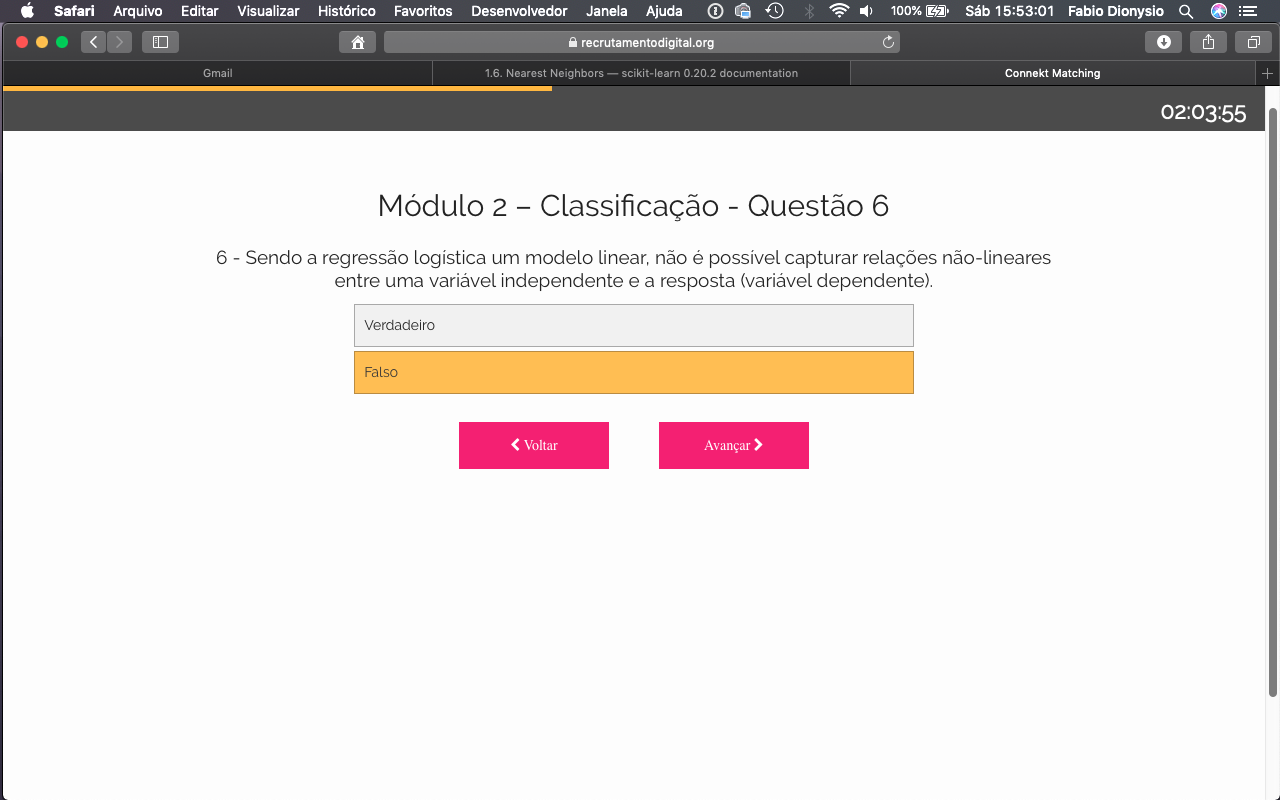

In [32]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 6.png'.format(PATH), width=900)

## 7

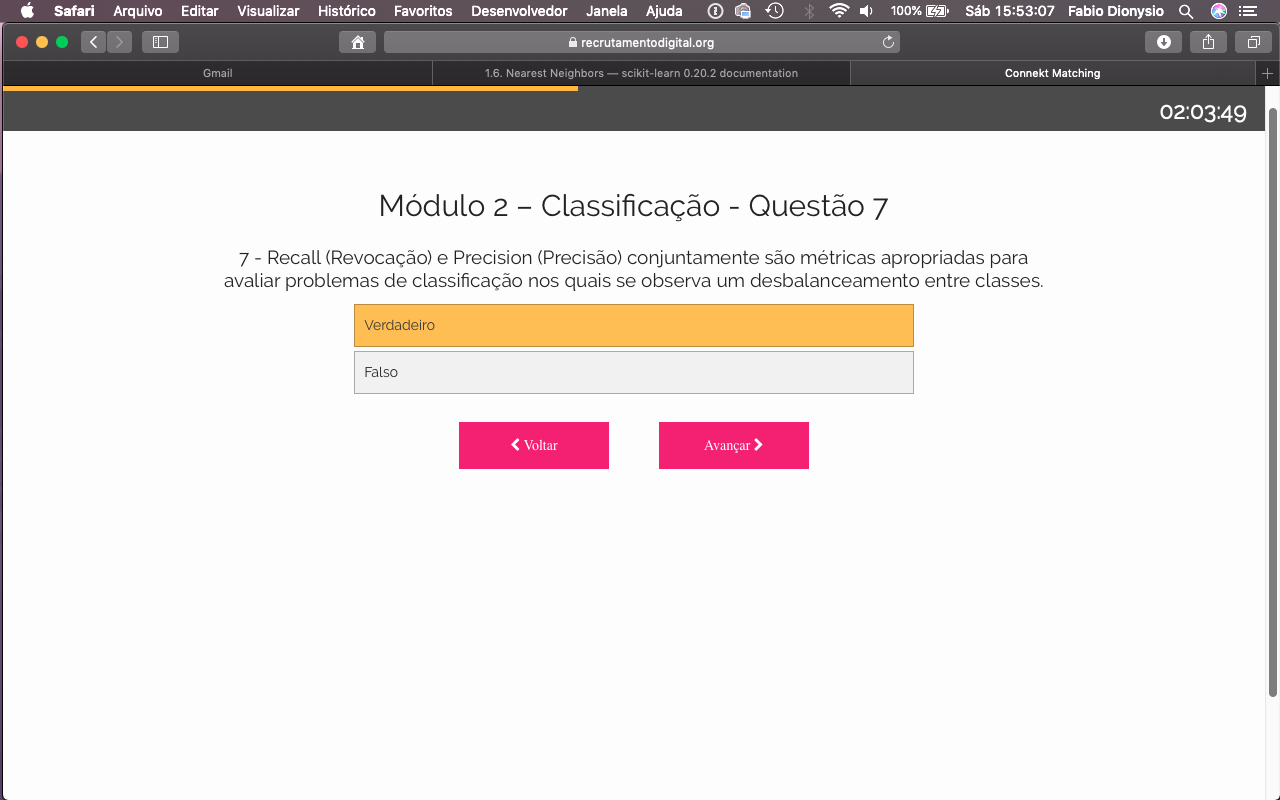

In [33]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 7.png'.format(PATH), width=900)

## 8

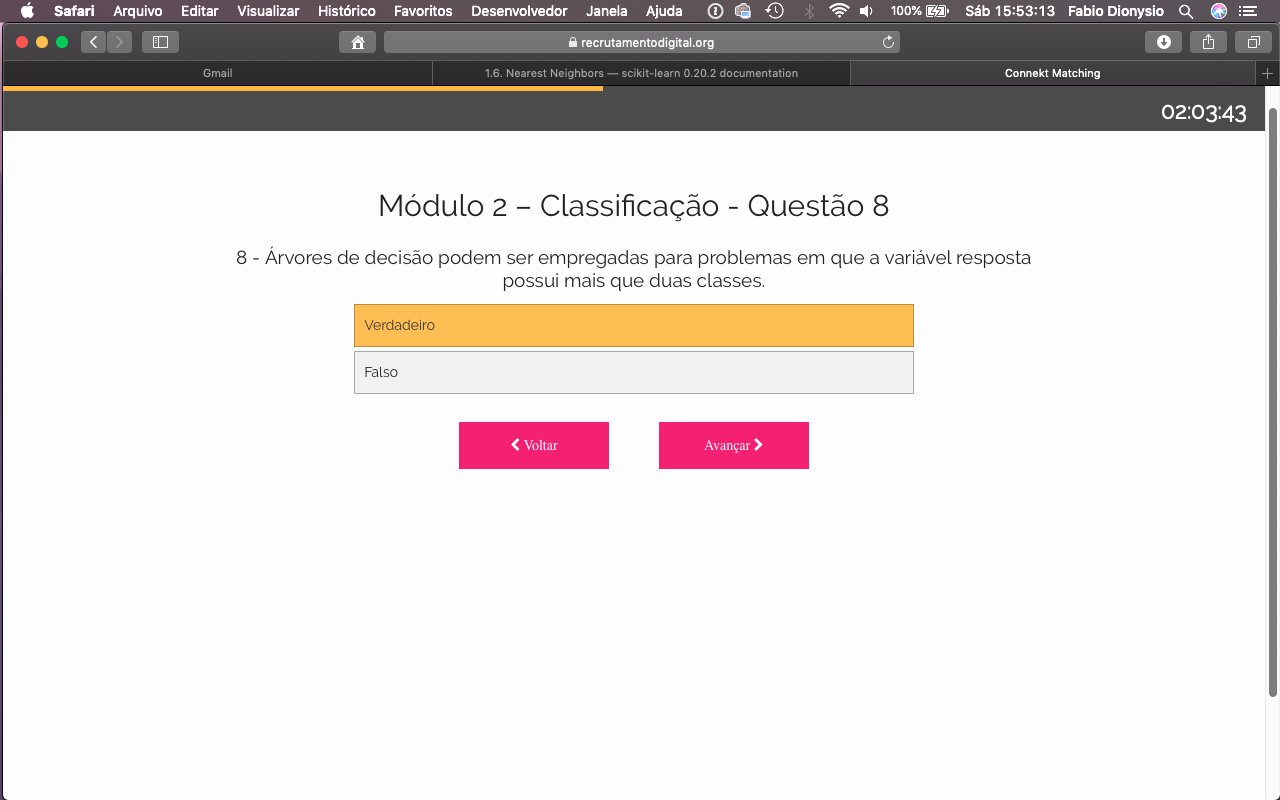

In [34]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 8.png'.format(PATH), width=900)

## 9

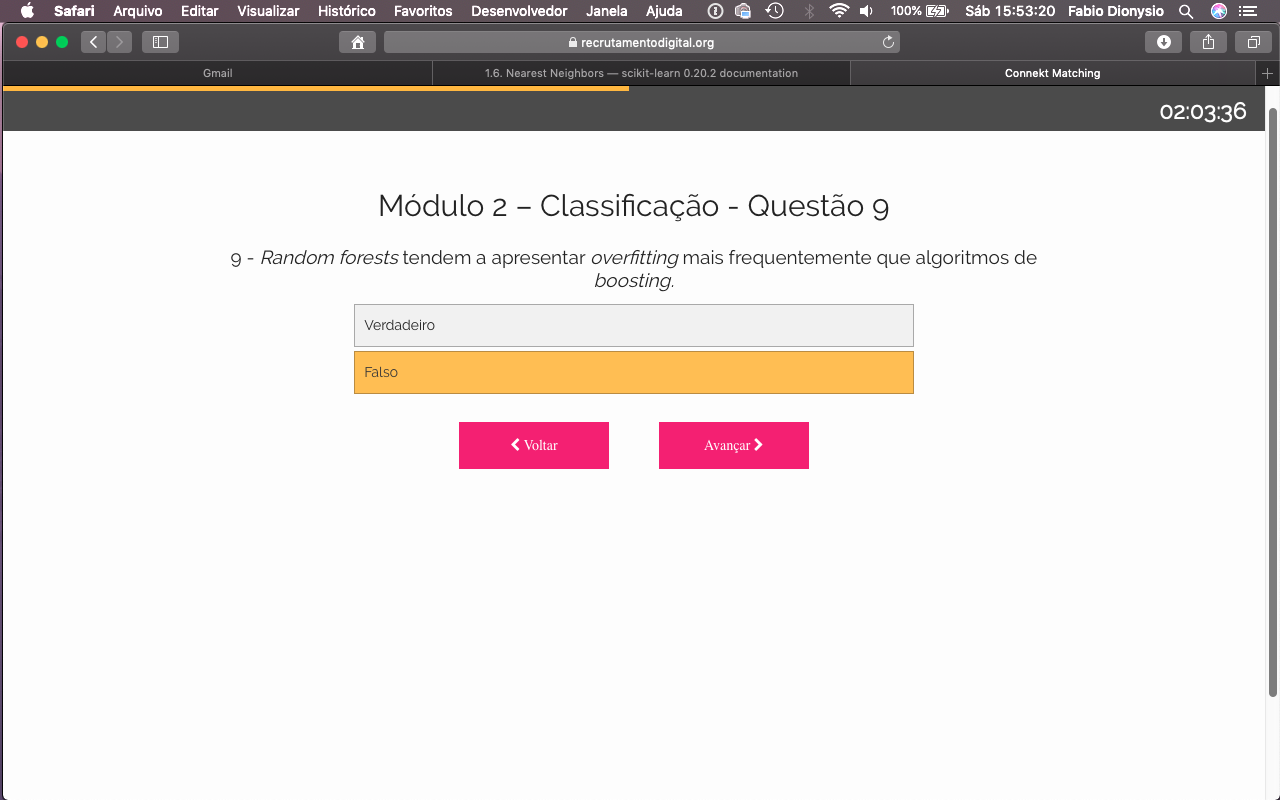

In [35]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 9.png'.format(PATH), width=900)

## 10

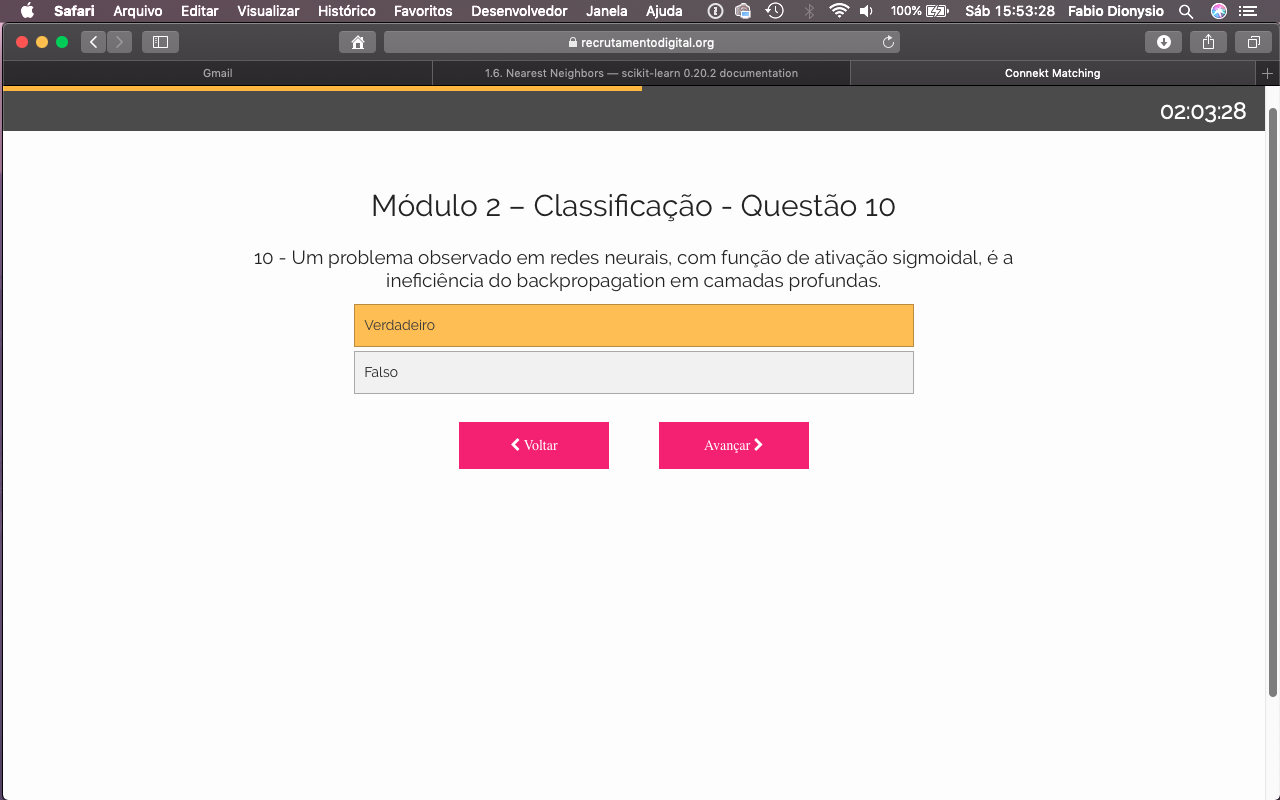

In [36]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 10.png'.format(PATH), width=900)

## 11

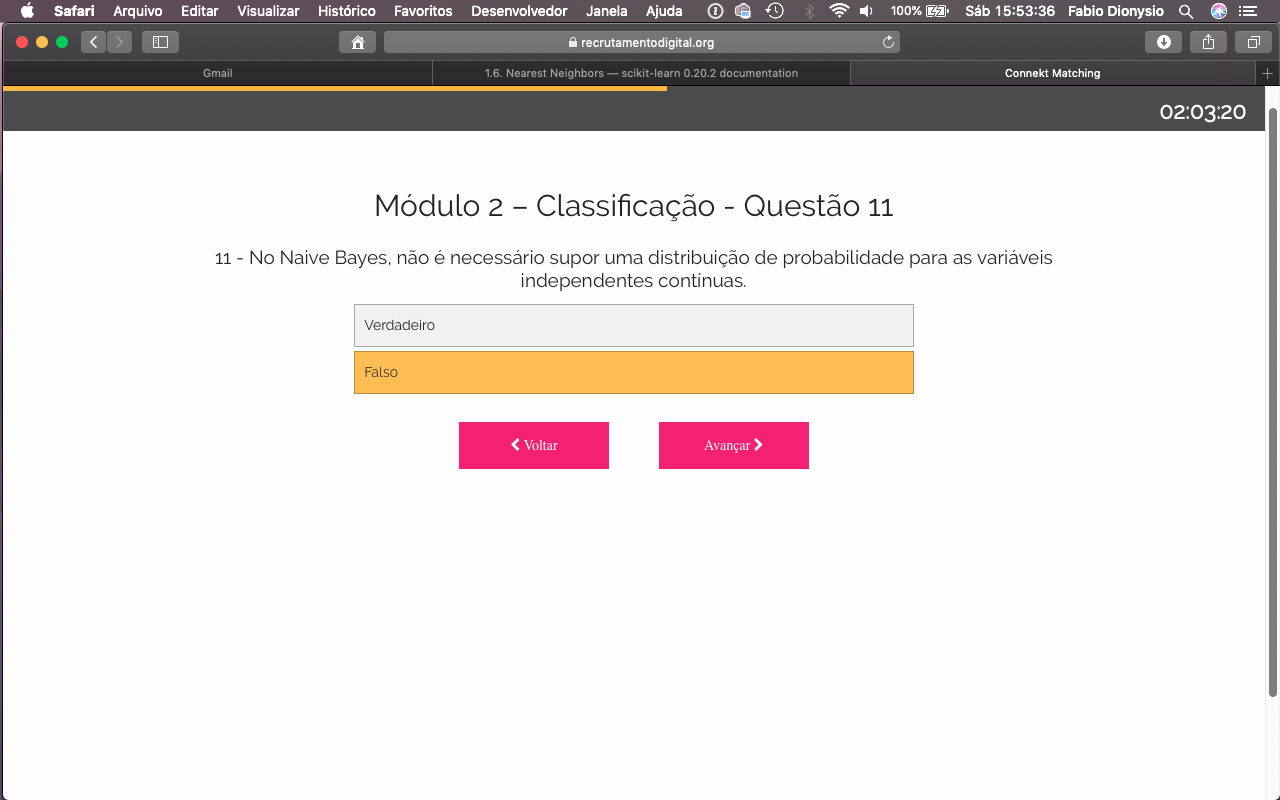

In [37]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 11.png'.format(PATH), width=900)

## 12

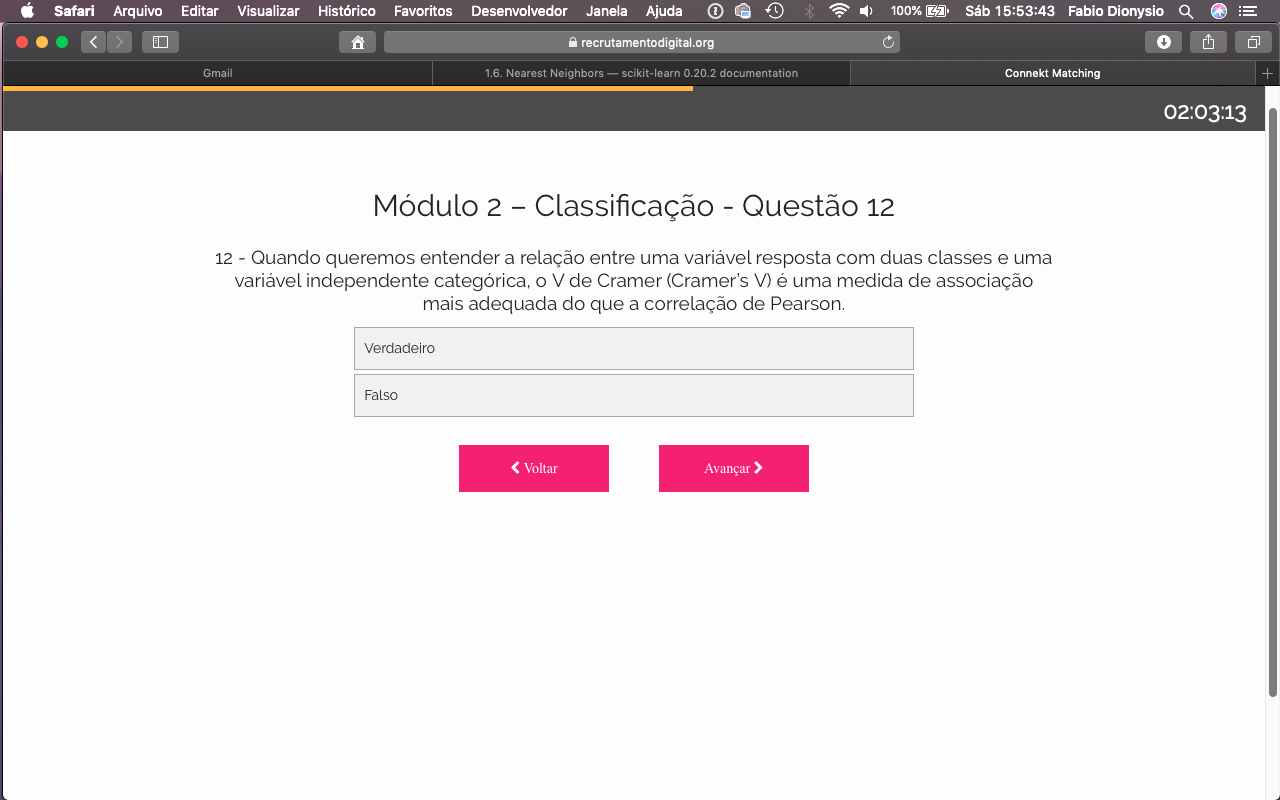

In [38]:
Image(filename = '{}/itub/Questoes/modulo 2 - classificacao - questao 12.png'.format(PATH), width=900)

# Módulo 3

## 1

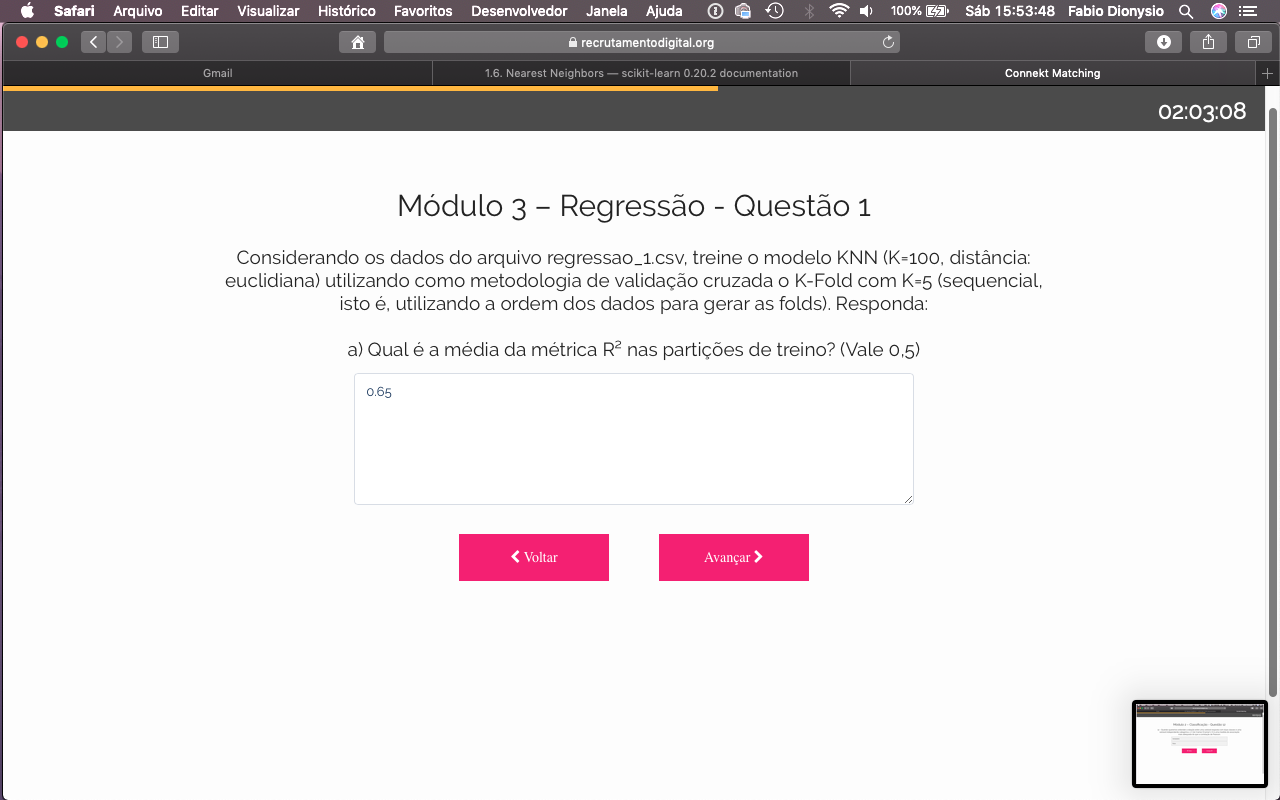

In [39]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 1 - a.png'.format(PATH), width=900)

In [57]:
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import r2_score


df = pd.read_csv('{}/itub/Questoes/regressao_1.csv'.format(PATH))
df.head()

v_1      v_2      v_3      v_4      v_5      v_6      v_7      v_8  \
0  0.41175 -0.88594  1.56763 -1.23920 -0.50609  0.40241 -0.19910 -0.36066   
1 -0.18248  0.25817 -2.06830  0.30318  0.55240  1.14899 -1.06234 -1.05560   
2  0.16163 -0.19307  0.60995  0.75154 -0.34150 -1.07175  0.82420 -0.70458   
3  0.77408 -0.22030 -1.50507  0.26270 -0.43915  0.61604 -0.07312  1.05734   
4  0.56369 -2.03858  1.00566 -0.22191  1.87744  0.92188  1.32863  1.23291   

       v_9     v_10     v_11     v_12     v_13     v_14     v_15     v_16  \
0  0.79811 -1.31550 -0.97004  0.25646 -0.97230  0.57444  0.86559  0.26008   
1 -0.39798  1.07560  0.32977  1.39860  0.13139  1.66229 -1.64970 -1.19903   
2  0.15541 -0.41075 -0.36719 -0.40403 -1.36095 -0.32300 -1.80617 -2.36065   
3  0.74734 -0.02001 -0.53163 -0.01862 -1.02064  0.20504 -0.46479  0.51637   
4  0.64139 -0.51216 -0.11285  1.36791  0.16337  0.17806 -0.79946  0.49963   

       target  
0   59.426681  
1 -124.336003  
2 -135.453843  
3   15.301539  
4    0.344680

In [58]:
scores = list()

X = df.drop(labels=['target'], inplace=False, axis=1)
y = df['target']

for train_id, test_id in KFold(n_splits=5).split(df):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    neigh = KNeighborsRegressor(n_neighbors=100, p=2)
    neigh.fit(X_train, y_train)

    # NAS PARTICOES DE TREINO !
    # y_pred = svc.predict(X_test)
    # scores.append(f1_score(y_test, y_pred))

    y_pred = neigh.predict(X_train)
    scores.append(r2_score(y_train, y_pred))

display(scores)
display(np.mean(scores))

[0.6467328347926193,
 0.6418381196513689,
 0.631264247587769,
 0.6526934608540541,
 0.641263683324671]

0.6427584692420965

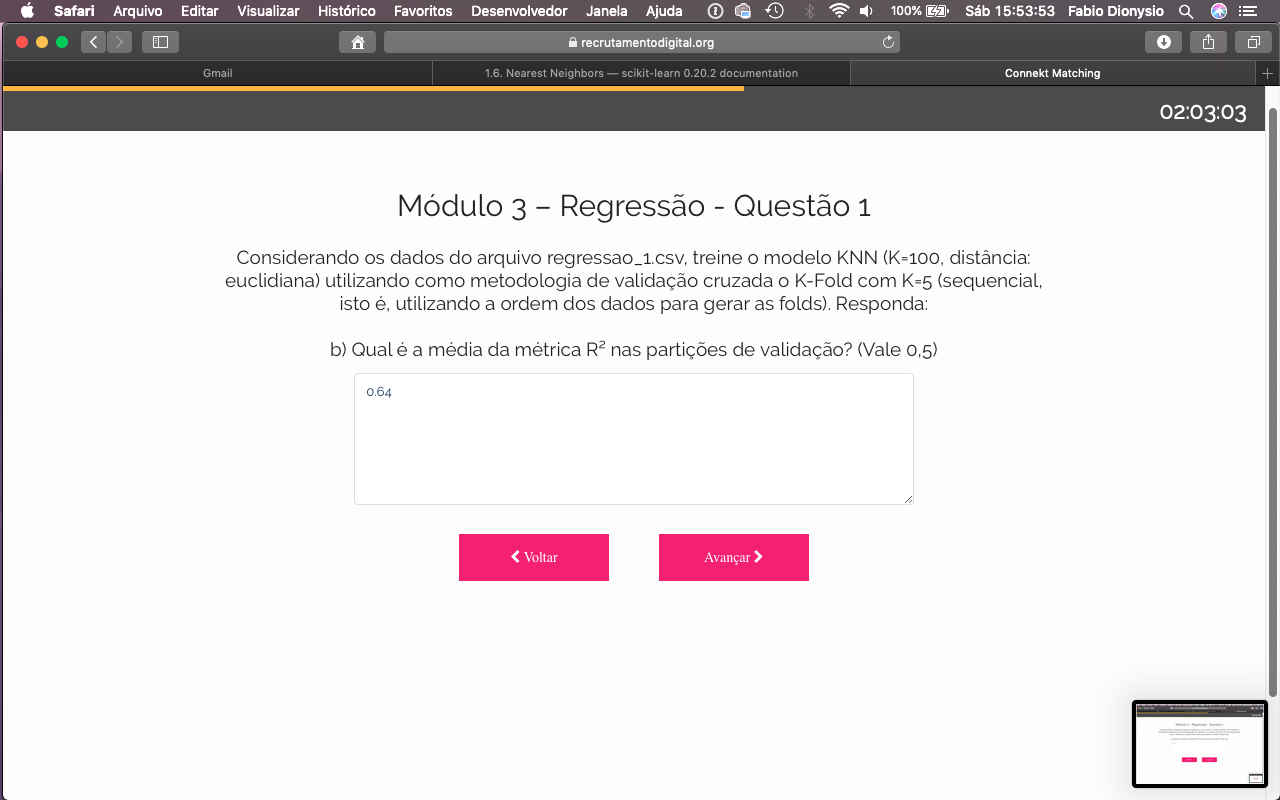

In [41]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 1 - b.png'.format(PATH), width=900)

In [59]:
scores = list()

X = df.drop(labels=['target'], inplace=False, axis=1)
y = df['target']

for train_id, test_id in KFold(n_splits=5).split(df):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    neigh = KNeighborsRegressor(n_neighbors=100, p=2)
    neigh.fit(X_train, y_train)

    # NAS PARTICOES DE TREINO !
    # y_pred = svc.predict(X_test)
    # scores.append(f1_score(y_test, y_pred))

    y_pred = neigh.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

display(scores)
display(np.mean(scores))

[0.634869774484915,
 0.6290989202159532,
 0.6365480520733863,
 0.6359366998740827,
 0.636523660147365]

0.6345954213591405

## 2

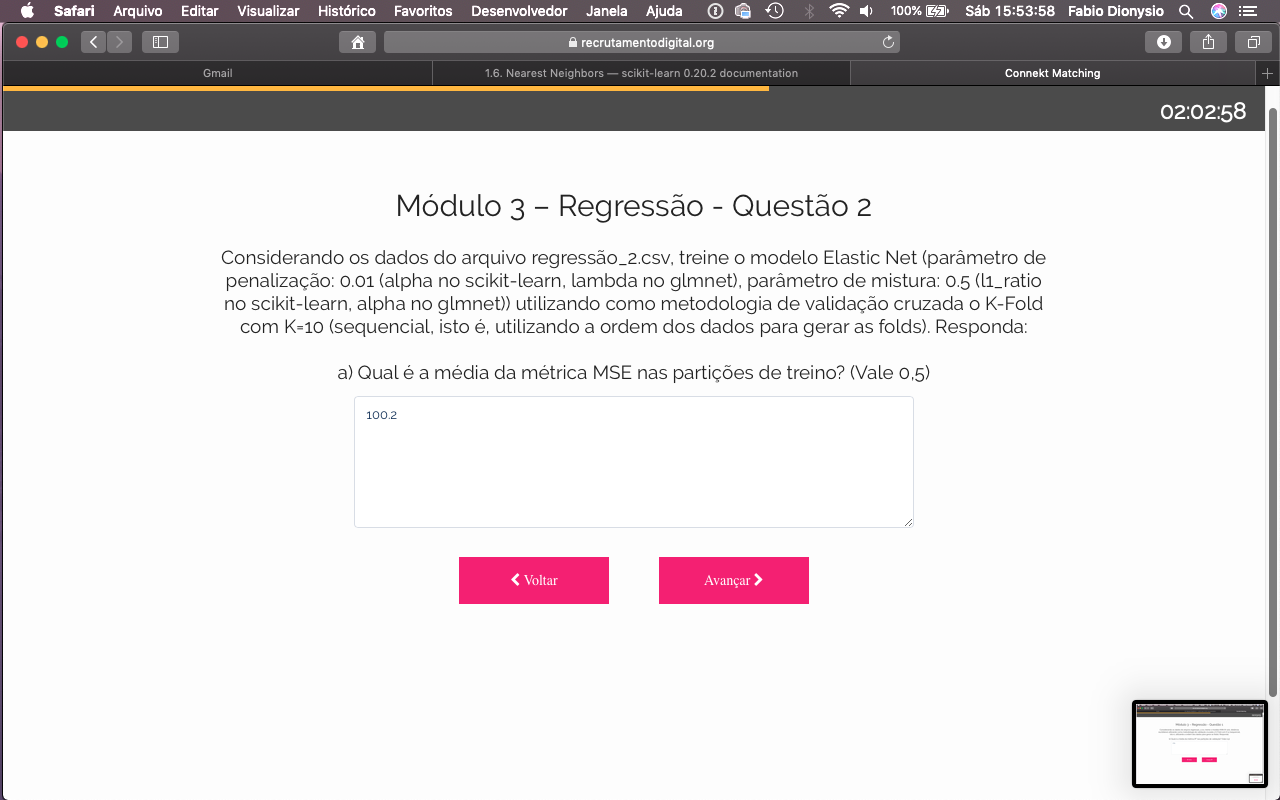

In [42]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 2 - a.png'.format(PATH), width=900)

In [61]:
from sklearn.linear_model    import ElasticNet
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics         import mean_squared_error


df = pd.read_csv('{}/itub/Questoes/regressao_2.csv'.format(PATH))
df.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.928565 -0.719700 -0.193906 -0.677486 -1.179784 -0.866473 -0.527861   
1 -1.262432 -0.803072 -0.026298  0.070038 -1.223663  0.169027  0.677987   
2  0.117189  0.853866  1.582002  1.481968  1.720371  0.209258  0.148371   
3 -0.148722 -0.133637  0.020990 -0.261777 -0.648657 -0.344005  0.689685   
4 -1.589064 -1.120601 -2.323954 -1.236945 -0.683011 -0.468862 -0.810920   

         V8        V9       V10     target  
0 -0.363196 -0.753120 -1.032732  -1.068407  
1 -0.170260  0.332584  0.504562  -0.476471  
2  1.694372  1.300706  1.236036  -6.258761  
3  0.503188  0.034081 -0.003327   4.029771  
4 -2.981145 -3.196629 -0.876743 -18.675821

In [63]:
scores = list()

X = df.drop(labels=['target'], inplace=False, axis=1)
y = df['target']

for train_id, test_id in KFold(n_splits=10).split(df):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
    elastic.fit(X_train, y_train)

    # NAS PARTICOES DE TREINO !
    # y_pred = svc.predict(X_test)
    # scores.append(f1_score(y_test, y_pred))

    y_pred = elastic.predict(X_train)
    scores.append(mean_squared_error(y_train, y_pred))

display(scores)
display(np.mean(scores))

[100.53133418398247,
 100.56519785780175,
 98.74735122890225,
 99.3594004996966,
 101.49008523695717,
 103.00624006698847,
 99.62913903135902,
 99.91998501673056,
 99.69633619742847,
 99.08692855342801]

100.20319978732748

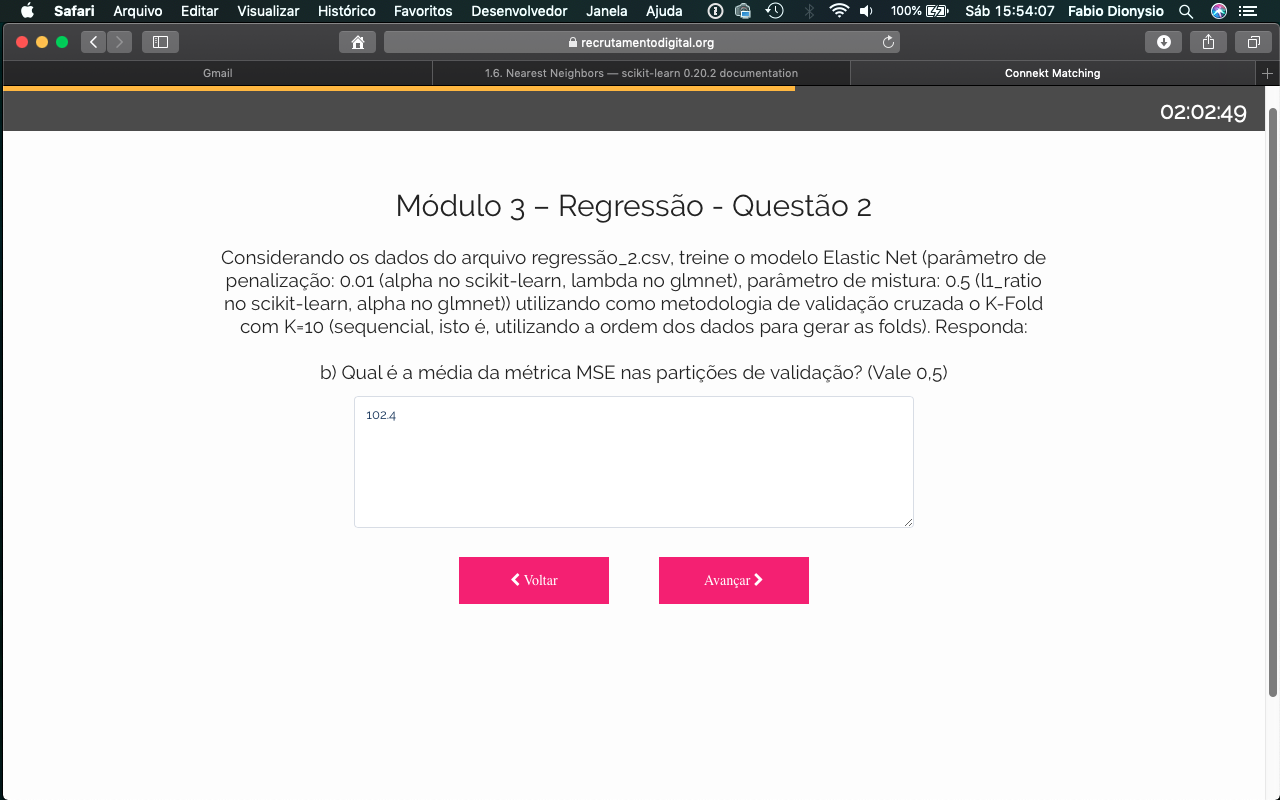

In [43]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 2 - b.png'.format(PATH), width=900)

In [64]:
scores = list()

X = df.drop(labels=['target'], inplace=False, axis=1)
y = df['target']

for train_id, test_id in KFold(n_splits=10).split(df):
    X_train, X_test = X.iloc[train_id], X.iloc[test_id]
    y_train, y_test = y.iloc[train_id], y.iloc[test_id]

    elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
    elastic.fit(X_train, y_train)

    # NAS PARTICOES DE TREINO !
    # y_pred = svc.predict(X_test)
    # scores.append(f1_score(y_test, y_pred))

    y_pred = elastic.predict(X_test)
    scores.append(mean_squared_error(y_test, y_pred))

display(scores)
display(np.mean(scores))

[99.74422361770785,
 99.26717785800598,
 116.04064442480767,
 110.39272097203069,
 90.53225866449343,
 76.54994592521014,
 107.62239182329208,
 104.98338163912021,
 106.34436163481756,
 112.51152427372922]

102.39886308332149

## 3

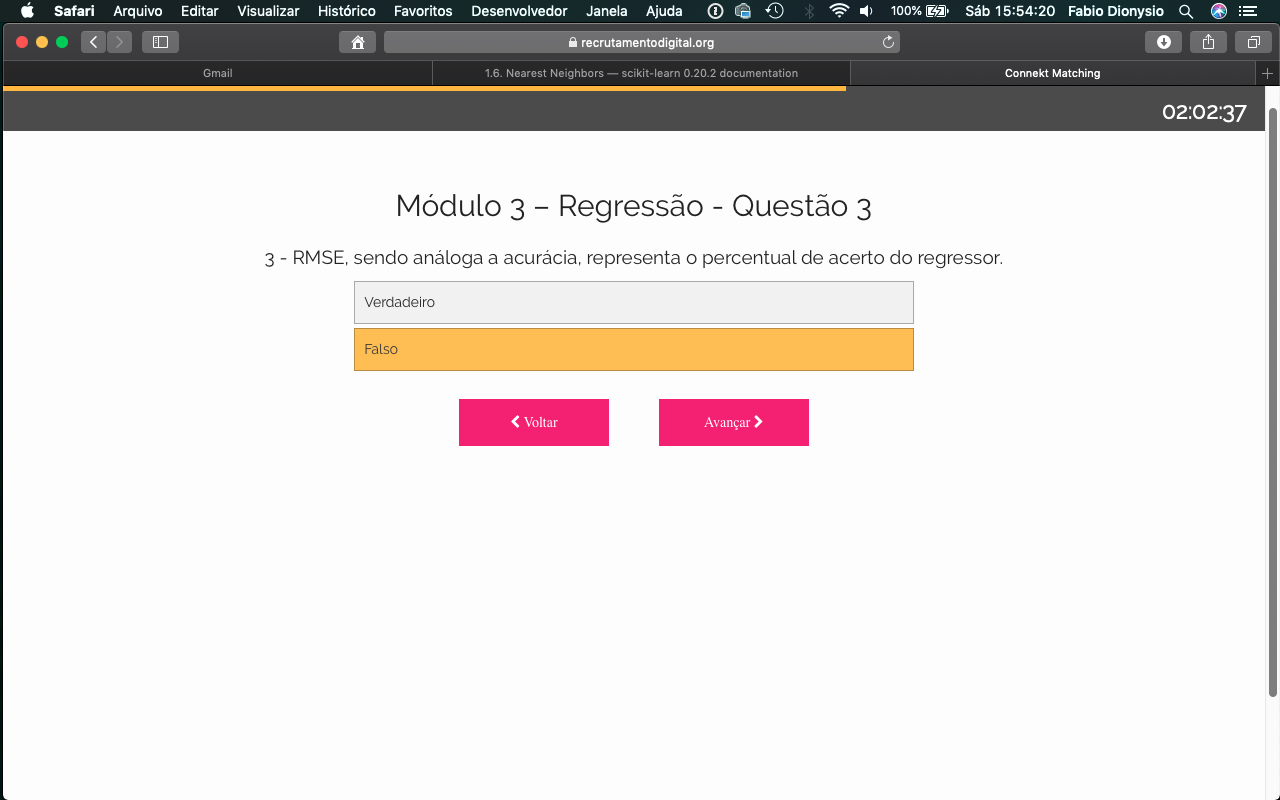

In [44]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 3.png'.format(PATH), width=900)

## 4

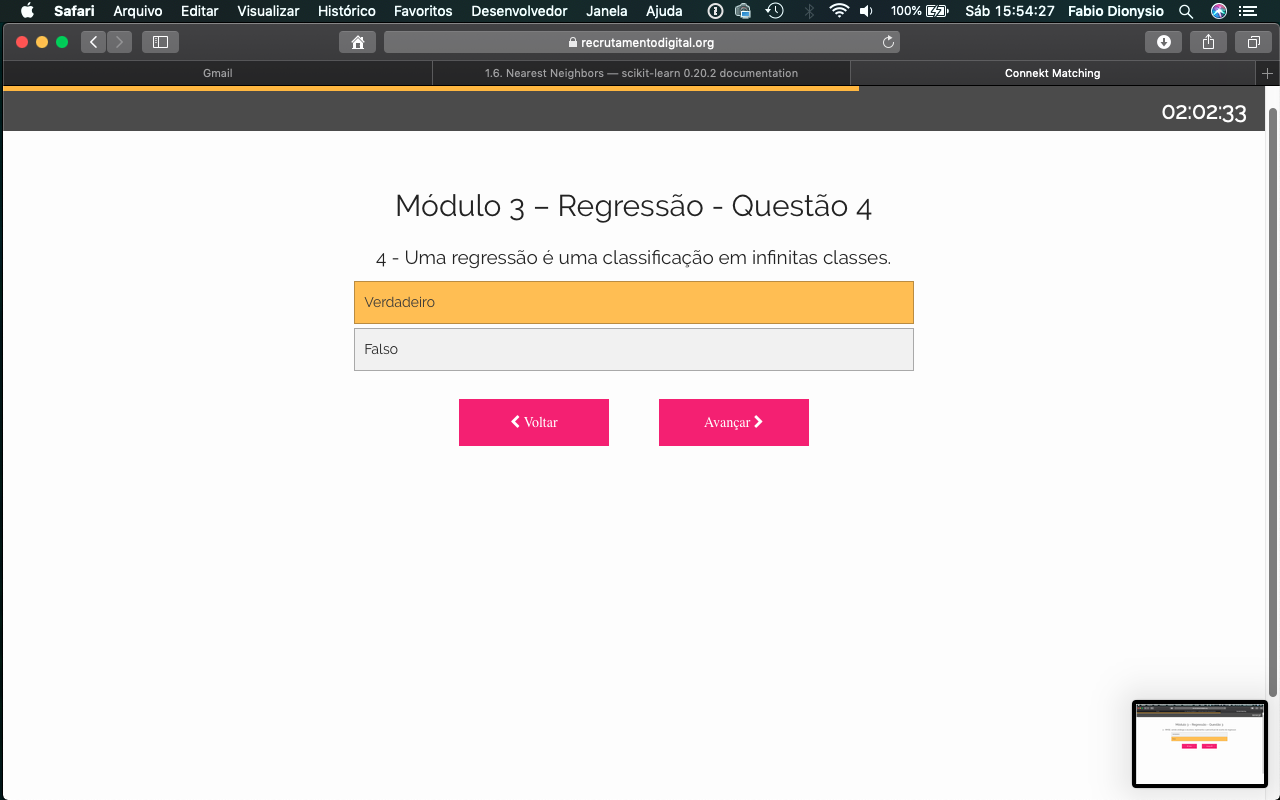

In [45]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 4.png'.format(PATH), width=900)

## 5

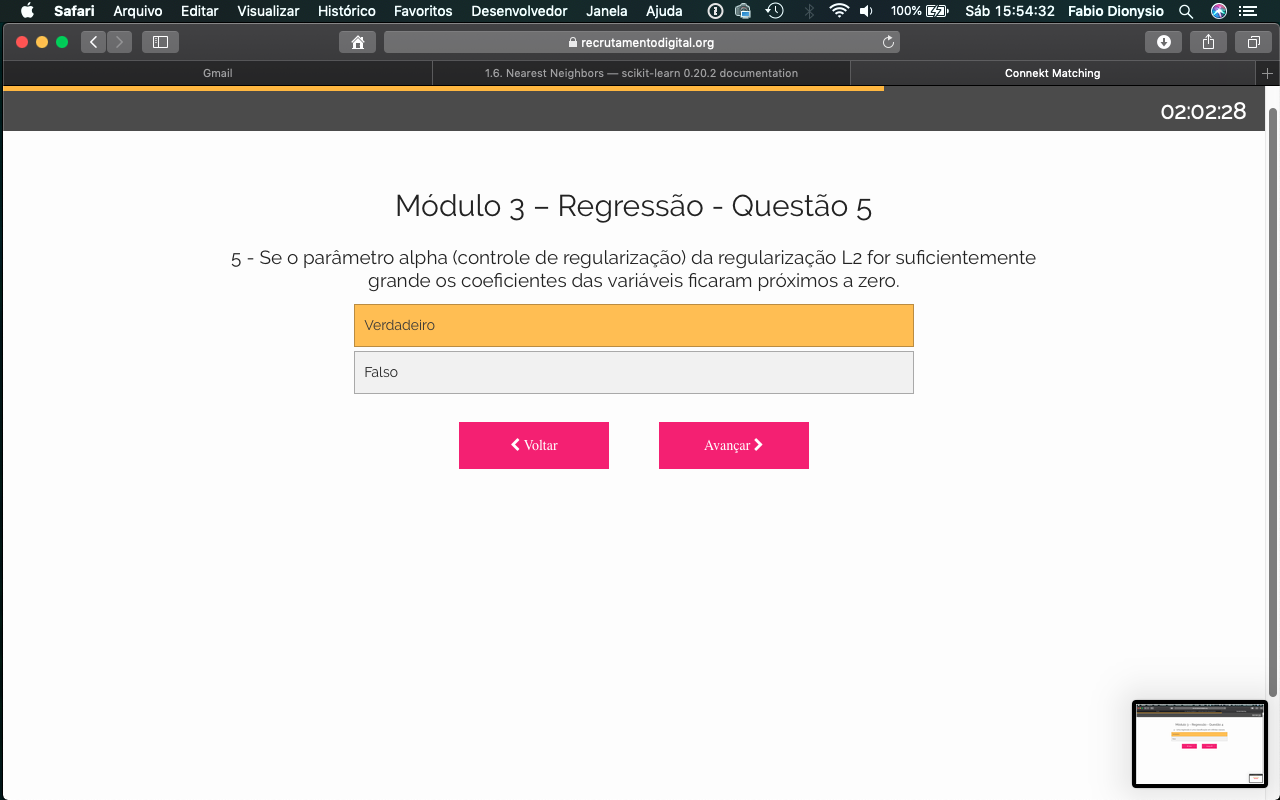

In [46]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 5.png'.format(PATH), width=900)

## 6

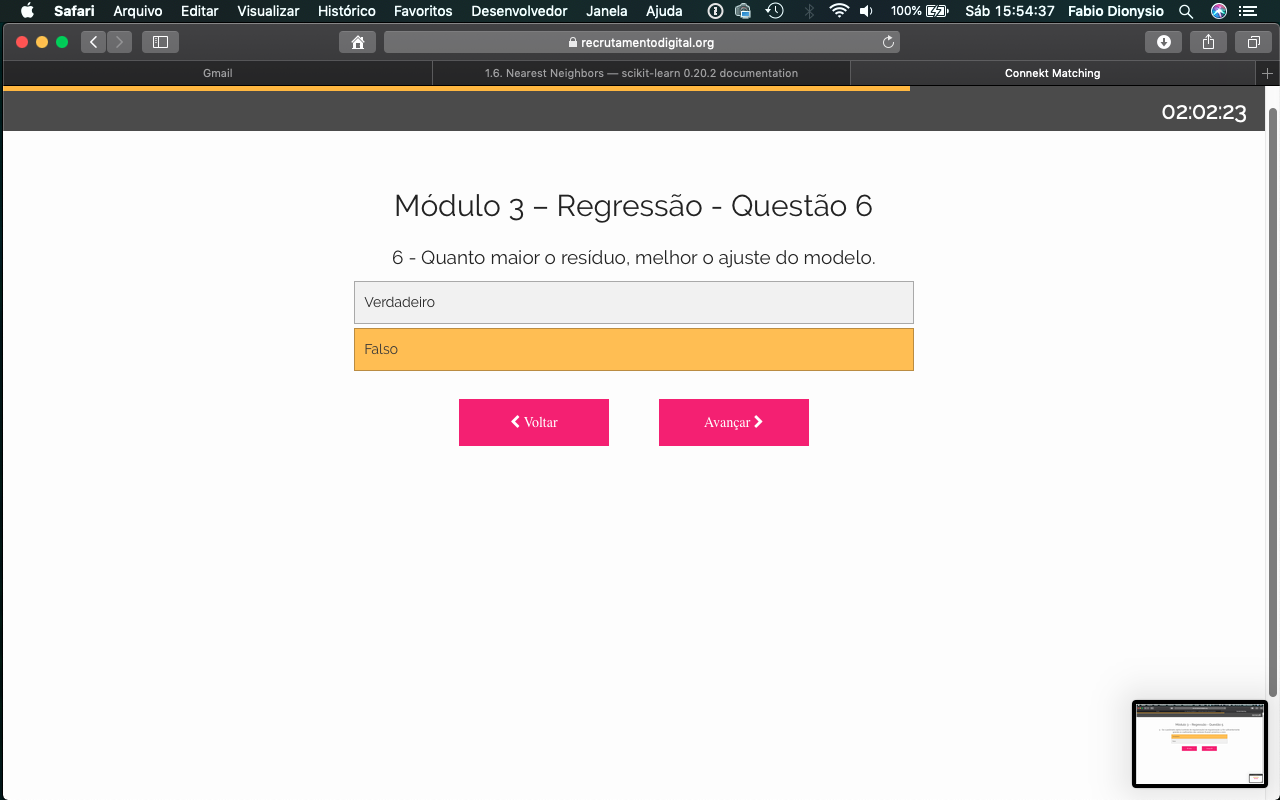

In [47]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 6.png'.format(PATH), width=900)

## 7

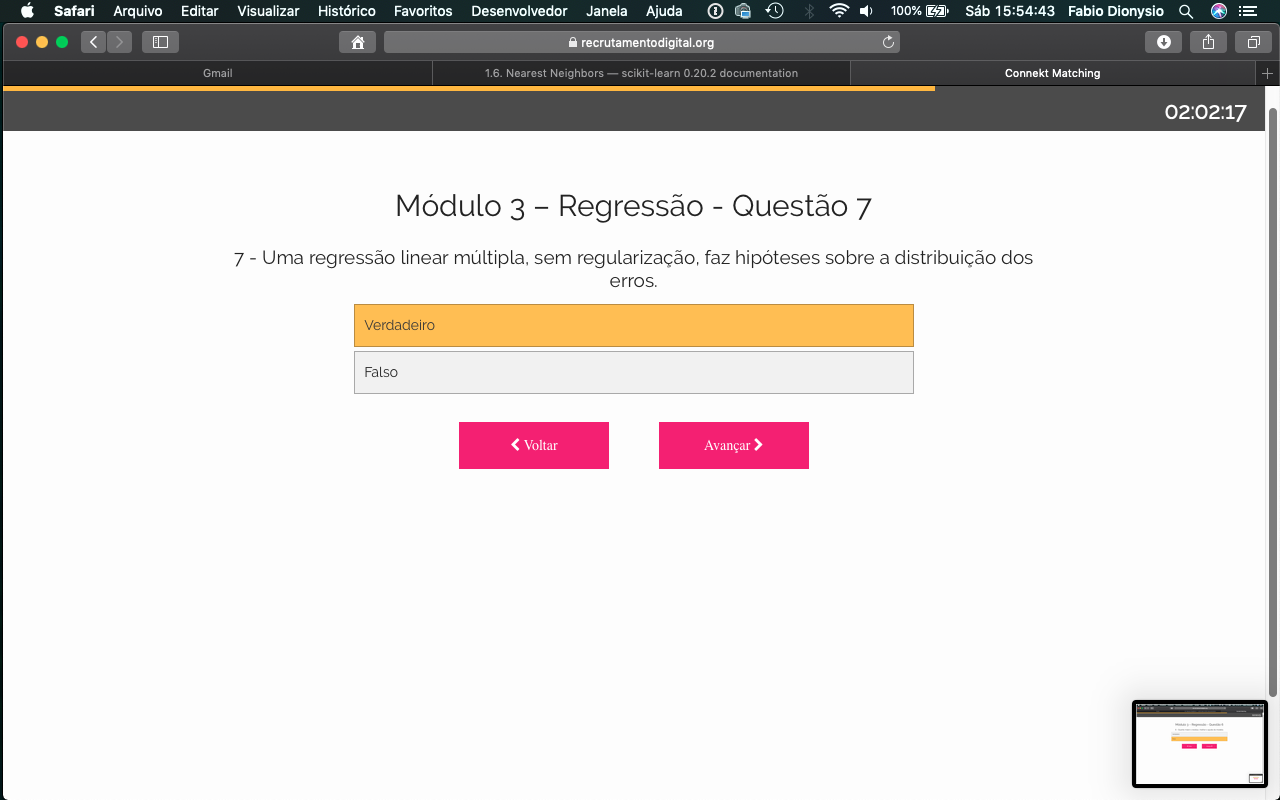

In [48]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 7.png'.format(PATH), width=900)

## 8

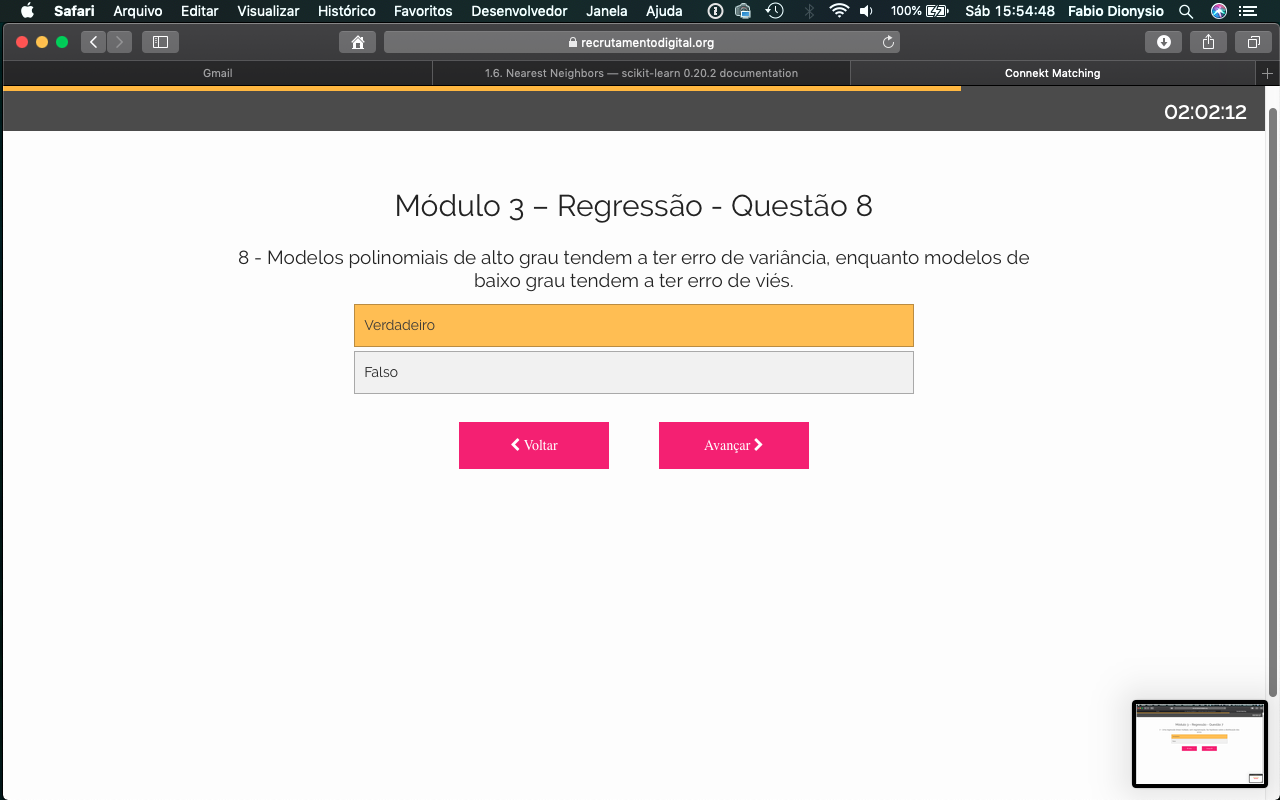

In [49]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 8.png'.format(PATH), width=900)

## 9

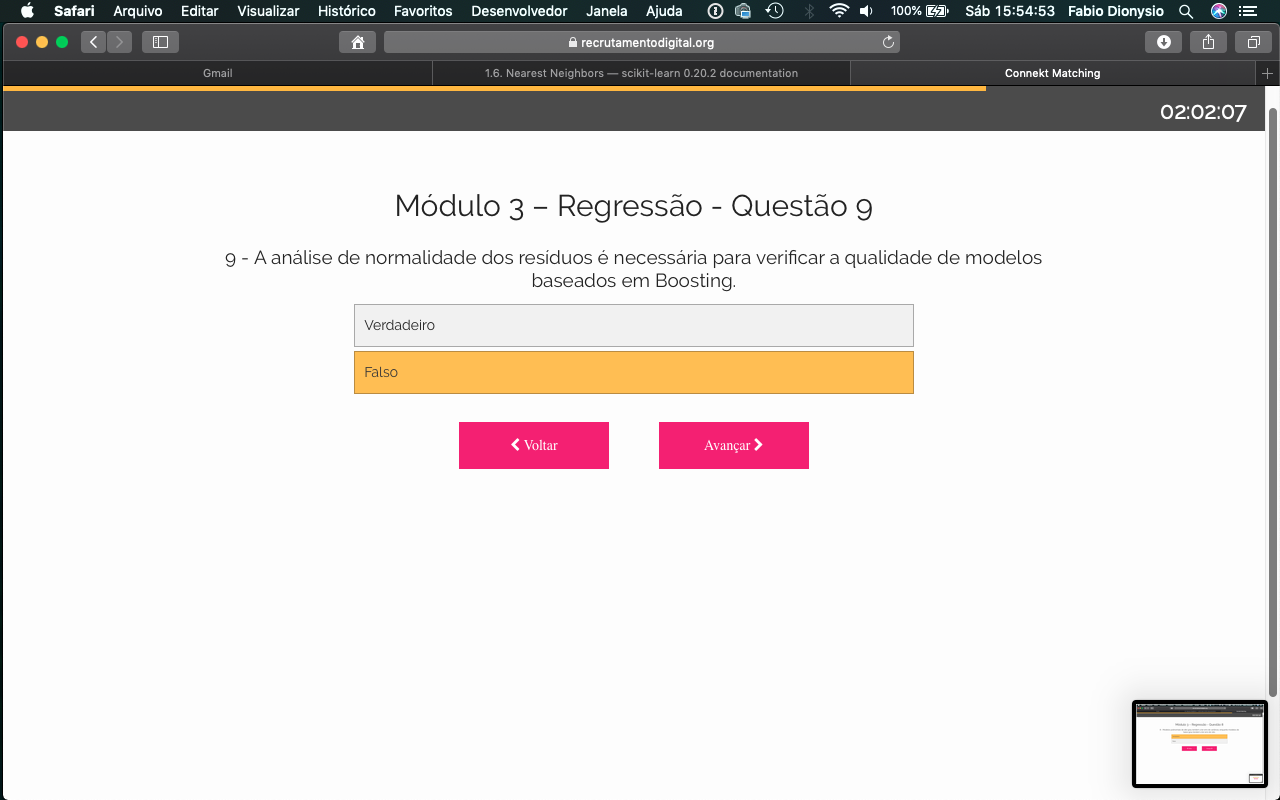

In [50]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 9.png'.format(PATH), width=900)

## 10

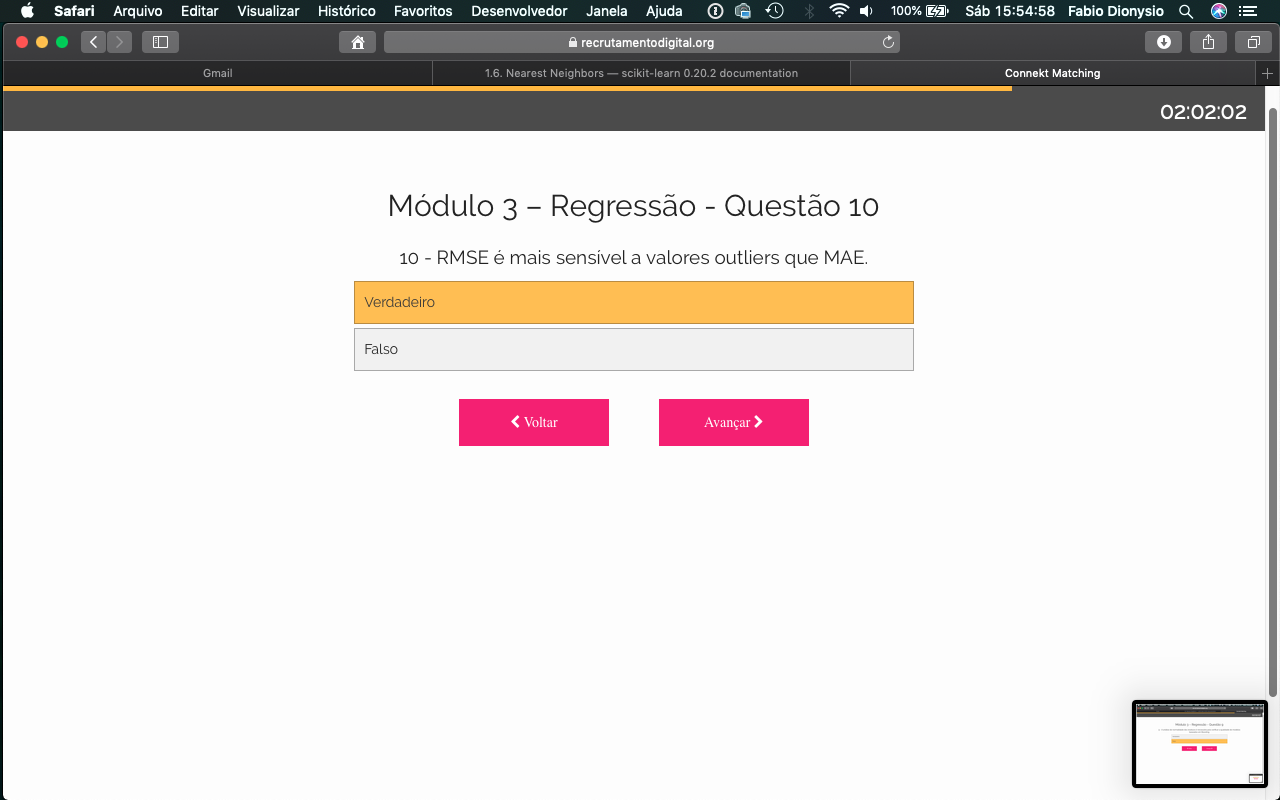

In [51]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 10.png'.format(PATH), width=900)

## 11

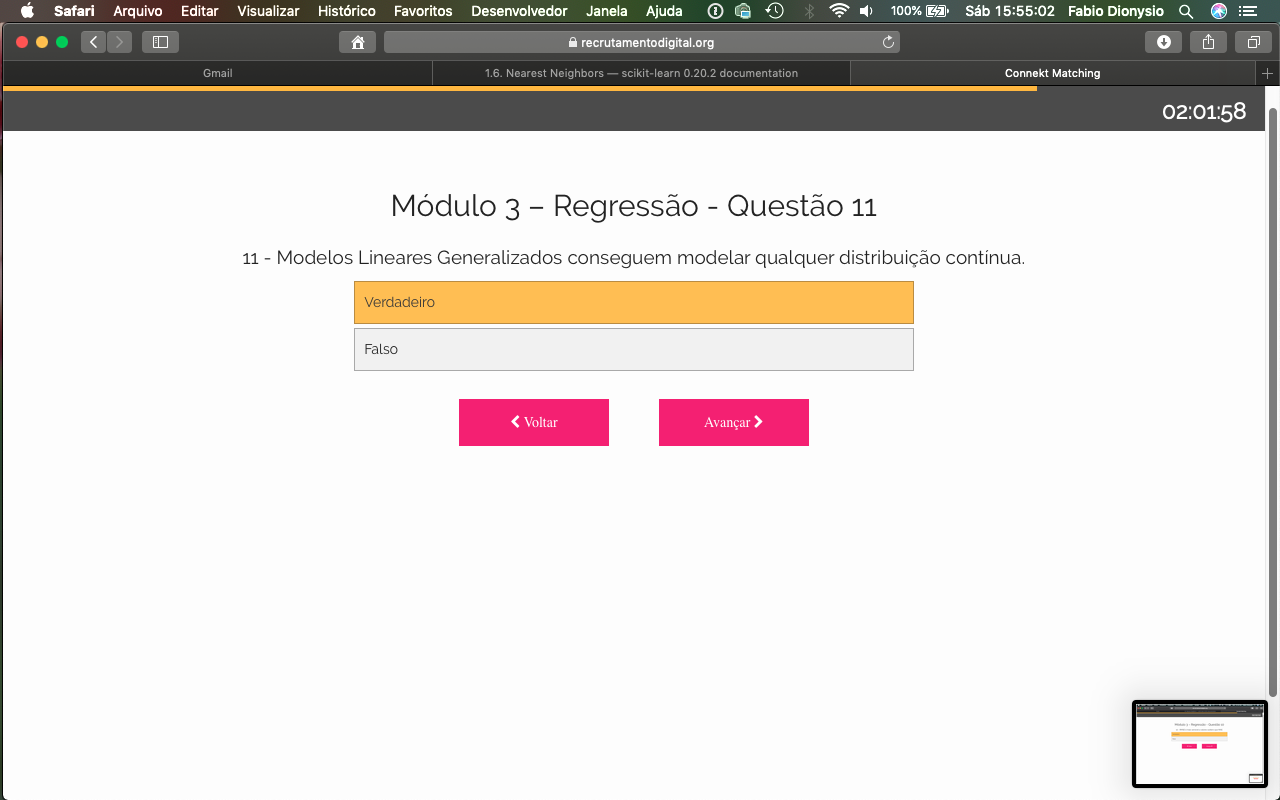

In [52]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 11.png'.format(PATH), width=900)

## 12

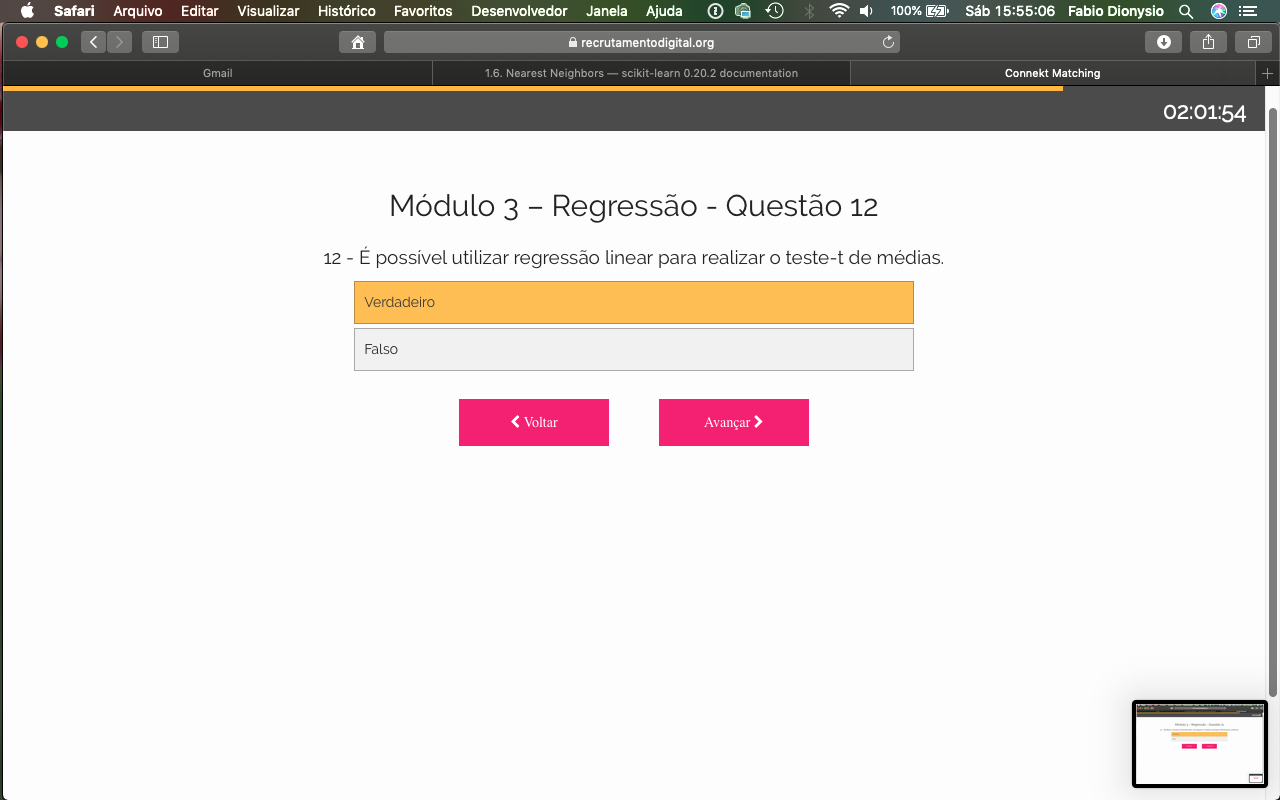

In [53]:
Image(filename = '{}/itub/Questoes/modulo 3 - regressao - questao 12.png'.format(PATH), width=900)